## Hair Loss Prediction

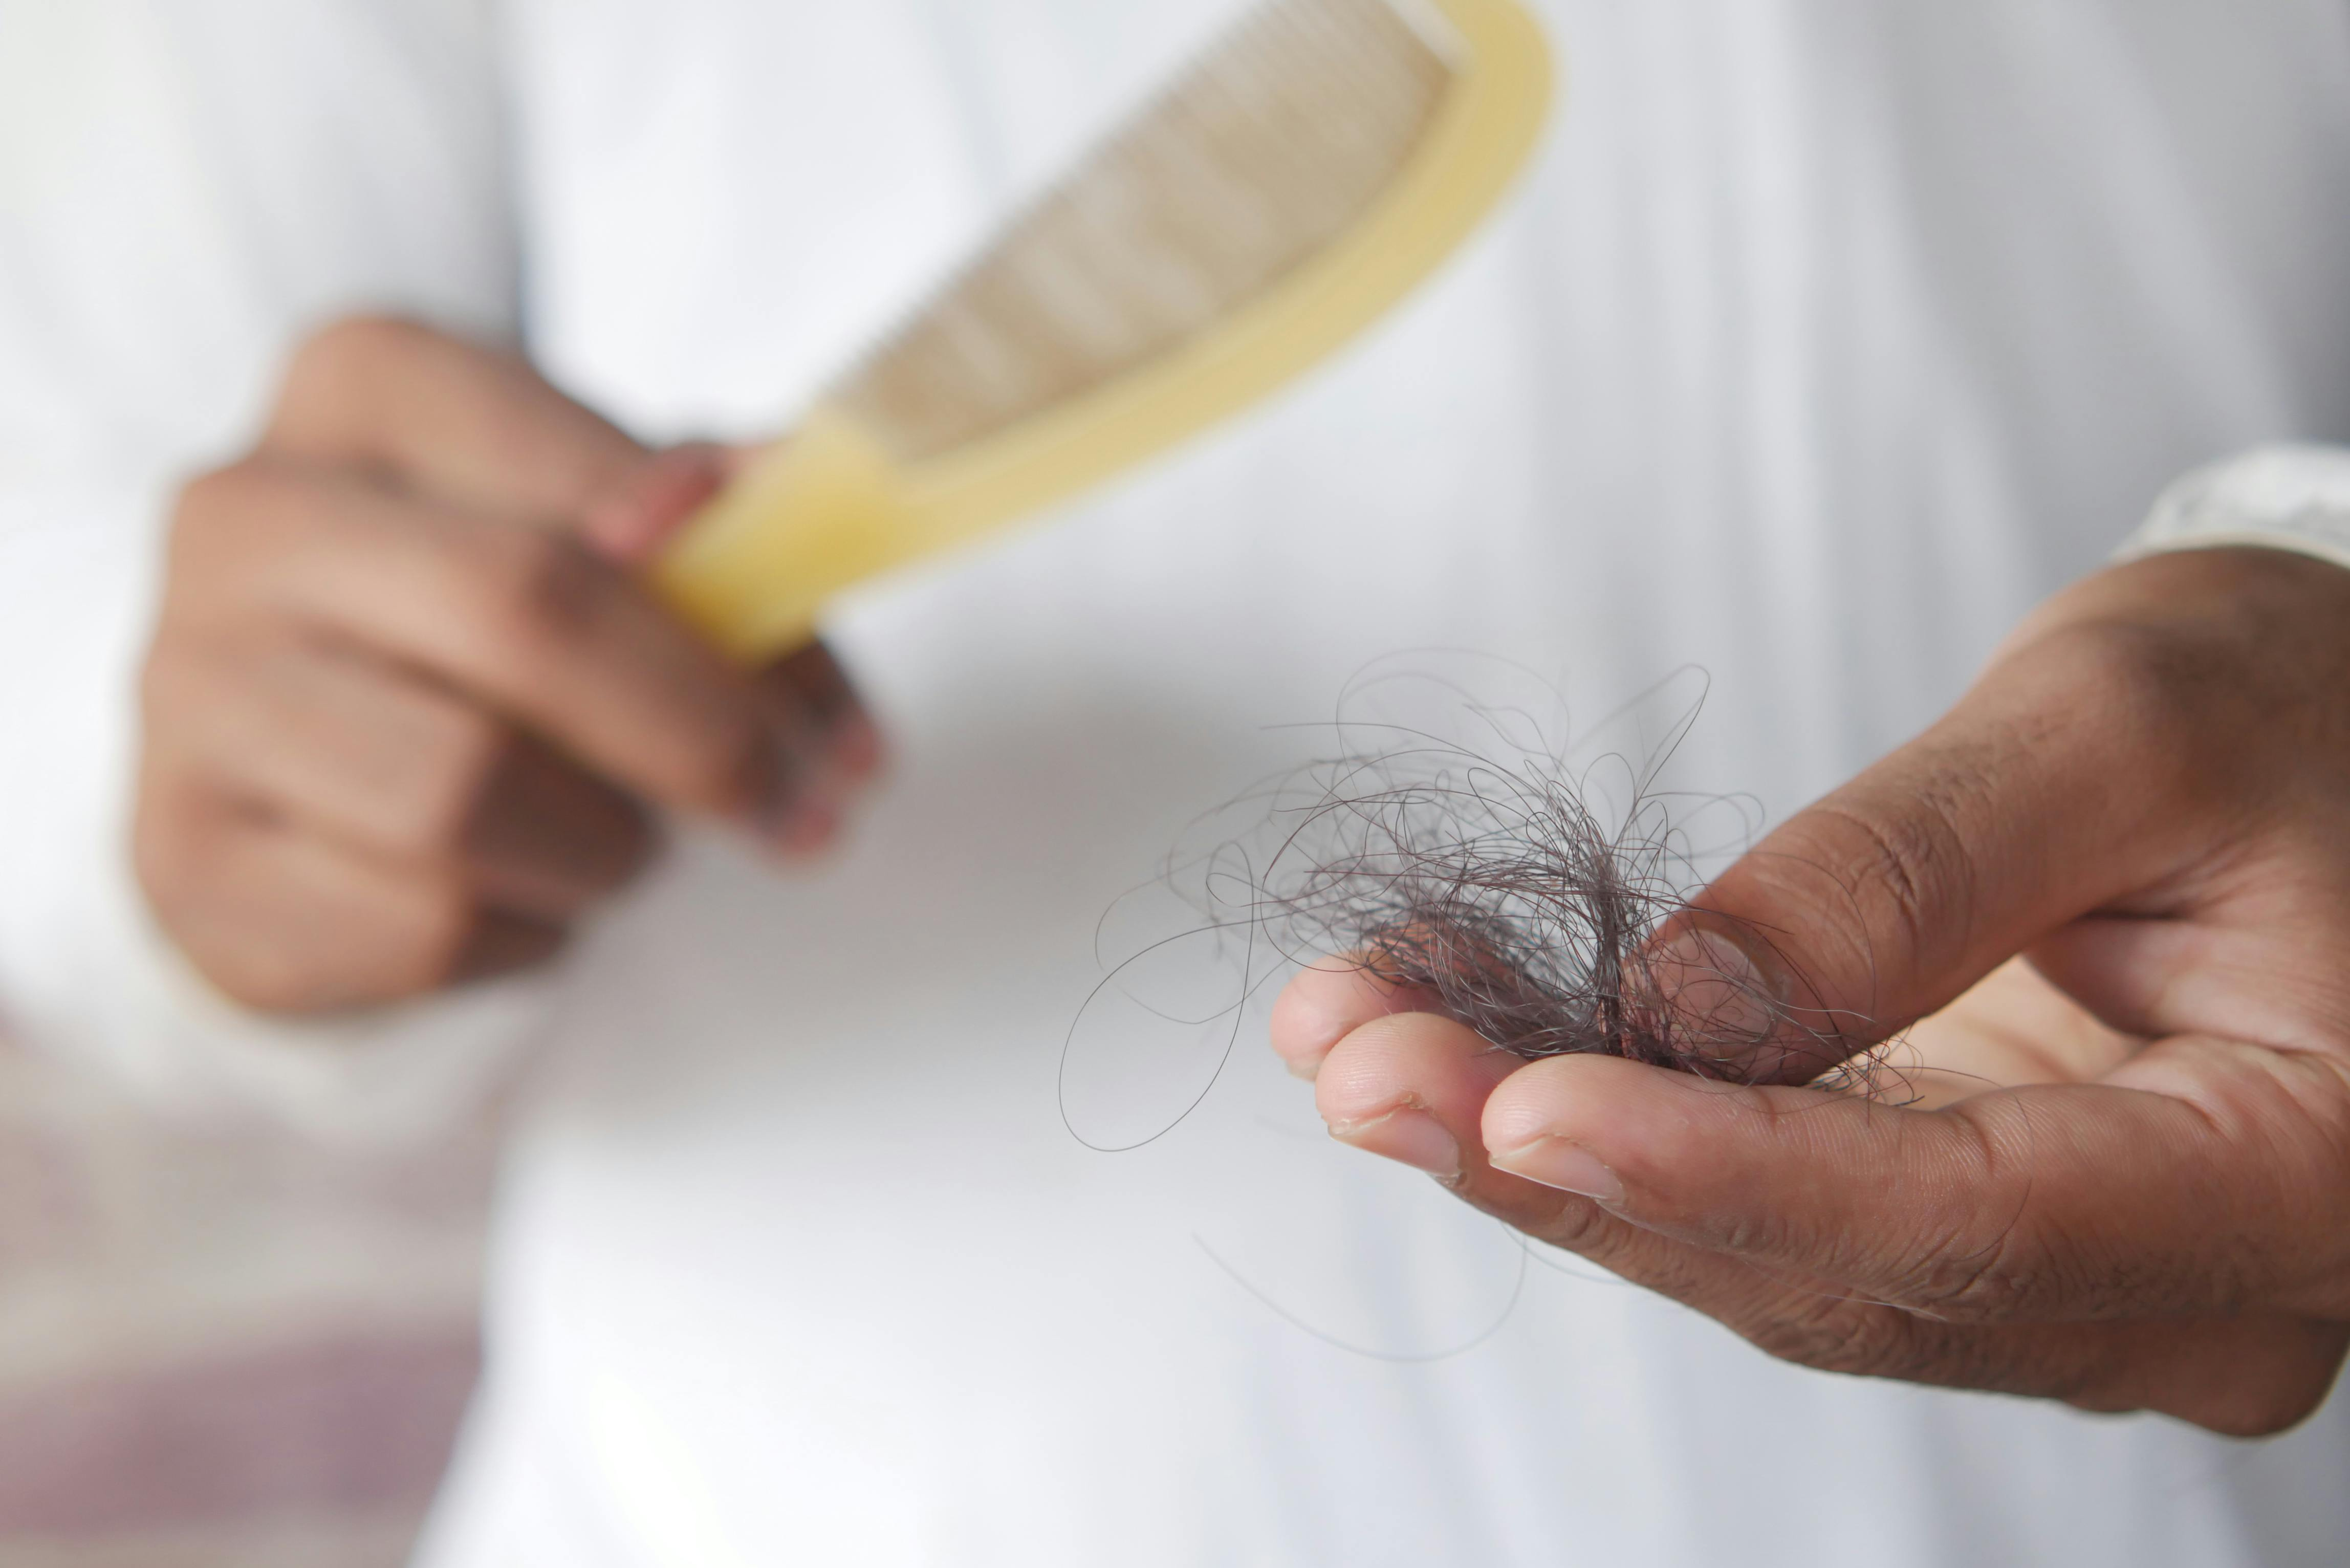

In [81]:
from IPython.display import Image,Markdown, display #importing the cover image
image_path = "hair.jpg"
# Display the image
Image(filename=image_path)

## Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Functions
  * 2.3 Configuration
* 3 Data Wrangling
  * 3.1 Data Validation
  * 3.2 Data cleaning
* 4 EXploratory Data Analysis
  * 4.1 Target Variable - Hair loss
  * 4.2 Numeri and Categorical Features
* 5 Model fitting and Evaluation
  * 5.1 Data Pre-processing
  * 5.2 Logistic Regression Model
  * 5.3 Random Forest Model
  * 5.4 Decision Tree Model
  * 5.5 Model Summary
* 6 Segmentation Analysis
  * 6.1 Scaling
  * 6.2 Principal Component Analyis
  * 6.3 Clustering Using Kmeans
  * 6.4 Hair Loss clusters
* 6 Summary

  

 
## 1. Introduction

As people age, hair loss becomes a common health concern impacting both appearance and overall well-being. Hair density is not only a cosmetic feature but also a potential indicator of health status. In my hair loss prediction project, I investigate a wide range of factors that may contribute to hair loss, including genetics, hormonal fluctuations, medical conditions, medications, nutritional deficiencies, psychological stress, and more. By performing extensive data exploration and analysis, I aim to uncover meaningful correlations between these factors and hair loss. The insights gained from this project could support individualized health management strategies, inform medical interventions, and benefit related industries focused on hair care and wellness.

### Objective:

The objective of this project is to develop a predictive model for hair loss risk by analyzing various contributing factors, including genetics, hormonal changes, medical conditions, medications, nutritional status, and psychological stress. Through data-driven insights, this project aims to identify significant correlations and build a reliable tool that can support personalized health management, guide medical interventions, and provide actionable recommendations.

### Methodology:

Here are the main steps of the project:

- Exploratory Data Analysis (EDA): Performing both univariate and bivariate analysis to understand the data distribution and relationships between variables.

- Predictive Modeling: Using logistic regression, random forest, and decision tree algorithms to build predictive models.

- Feature Importance: Determining the importance of each feature in the models.

- Model Evaluation: Evaluating the models using metrics such as AUC (Area Under the ROC Curve) and accuracy.

- Cluster Analysis: Grouping similar data points using k-means clustering techniques.


### Data:

A survey was done and provides the information needed in the Predict Hair Fall.csv in the data folder. Data contains information on persons in this survey. Each row represents one person.

- Id - A unique identifier for each person.

- Genetics - Whether the person has a family history of baldness.

- Hormonal Changes - Indicates whether the individual has experienced hormonal changes (Yes/No).

- Medical Conditions - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.

- Medications & Treatments - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.

- Nutritional Deficiencies - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, 
biotin deficiency, omega-3 fatty acid deficiency, etc.

- Stress - Indicates the stress level of the individual (Low/Moderate/High).

- Age - Represents the age of the individual.

- Poor Hair Care Habits - Indicates whether the individual practices poor hair care habits (Yes/No).

- Environmental Factors - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).

- Smoking - Indicates whether the individual smokes (Yes/No).

- Weight Loss - Indicates whether the individual has experienced significant weight loss (Yes/No).

- Hair Loss - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

### Summary :

Exploratory Data Analysis (EDA) uncovered critical insights into the relationships between various factors and hair loss. It revealed that genetic predisposition and specific medical conditions, such as alopecia, are strongly correlated with hair loss. Nutritional deficiencies and high stress levels also have a moderate association with hair loss, while factors like smoking and poor hair care habits showed weaker associations.

I developed logistic regression, random forest, and decision tree models, with the decision tree model performing the best, though its accuracy remained below 60%.

Key features in the predictive models were age, medical conditions, and nutritional deficiencies.

K-means clustering segmented individuals into three distinct groups based on age and hair loss patterns, highlighting significant demographic trends across the clusters.



## 2. Libraries & Configurations

### 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [82]:

"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
import altair as alt    #altair for declarative statistical visualization
from scipy import stats     # for statistics
import seaborn as sns # for visualization
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.linear_model import LogisticRegression #base linear regression model
from sklearn.ensemble import RandomForestClassifier #Esemble linear regression model
from sklearn.tree import DecisionTreeClassifier #Tree based model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA #Dimentionality reduction
from sklearn.cluster import KMeans #Clustering
from sklearn.feature_selection import RFE #feature importance
%matplotlib inline

### 2.2 Functions
Defining the functions for the analysis


In [83]:
# utility function to print markdown string
def printmd(string):
    display(Markdown(string))
    
def chi2_test(col):
    """
    Perform Chi-Square Test of Independence for a specified column against Hair Loss.

    Parameters:
    col (str): The name of the column to test.
    df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
    str: The result of the Chi-Square test interpretation.
    """

    # Creating the contingency table
    contingency_table = pd.crosstab(df[col], df['Hair Loss'])

    # Performing the Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {round(chi2,4)}")
    print(f"P-Value: {round(p,4)}")

    # Interpretation
    alpha = 0.05
    if p < alpha:
        result = f"There is a significant association between {col} and hair loss."
    else:
        result = f"There is no significant association between {col} and hair loss."
    
    return result


### 2.3 Configurations
Setting the configurations to be used for our analysis.

In [84]:
# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid", palette="colorblind")
#displaying all columns
pd.set_option('display.max_columns', None)


## 3. Data Wrangling

Loading and wrangling the data


In [85]:
#loading the dataframe
df= pd.read_csv(r'data/Predict Hair Fall.csv')
#viewing the dataframe
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [86]:
#checking the number of rows and columns in the dataframe
df.shape

(999, 13)

This data set has 999 rows and 13 columns consisting of both numeric and categorical features.

### 3.1 Data Validation
validating the dataset

In [87]:
#cheking information on the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [88]:
#checking statistical information about the numeric colunms
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


In [89]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    printmd(f'#### {col}:\n - {df[col].unique()}')

#### Genetics:
 - ['Yes' 'No']

#### Hormonal Changes:
 - ['No' 'Yes']

#### Medical Conditions:
 - ['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']

#### Medications & Treatments:
 - ['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']

#### Nutritional Deficiencies :
 - ['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']

#### Stress:
 - ['Moderate' 'High' 'Low']

#### Poor Hair Care Habits :
 - ['Yes' 'No']

#### Environmental Factors:
 - ['Yes' 'No']

#### Smoking:
 - ['No' 'Yes']

#### Weight Loss :
 - ['No' 'Yes']

The data validation process confirmed the accuracy of the data, but some patients have no records for their medical condition, medication/treatment, and nutritional deficiencies, recorded with the input "No Data."

In [90]:
#dropping Id column becuase it is a unique identifier
df.drop(['Id'],axis=1,inplace=True)

In [91]:
#Mapping hair loss data to "Yes" and "No" for improved visualization.
df['Hair Loss']= df['Hair Loss'].map({0:'No',1:'Yes'})

### 3.2 Data Cleaning

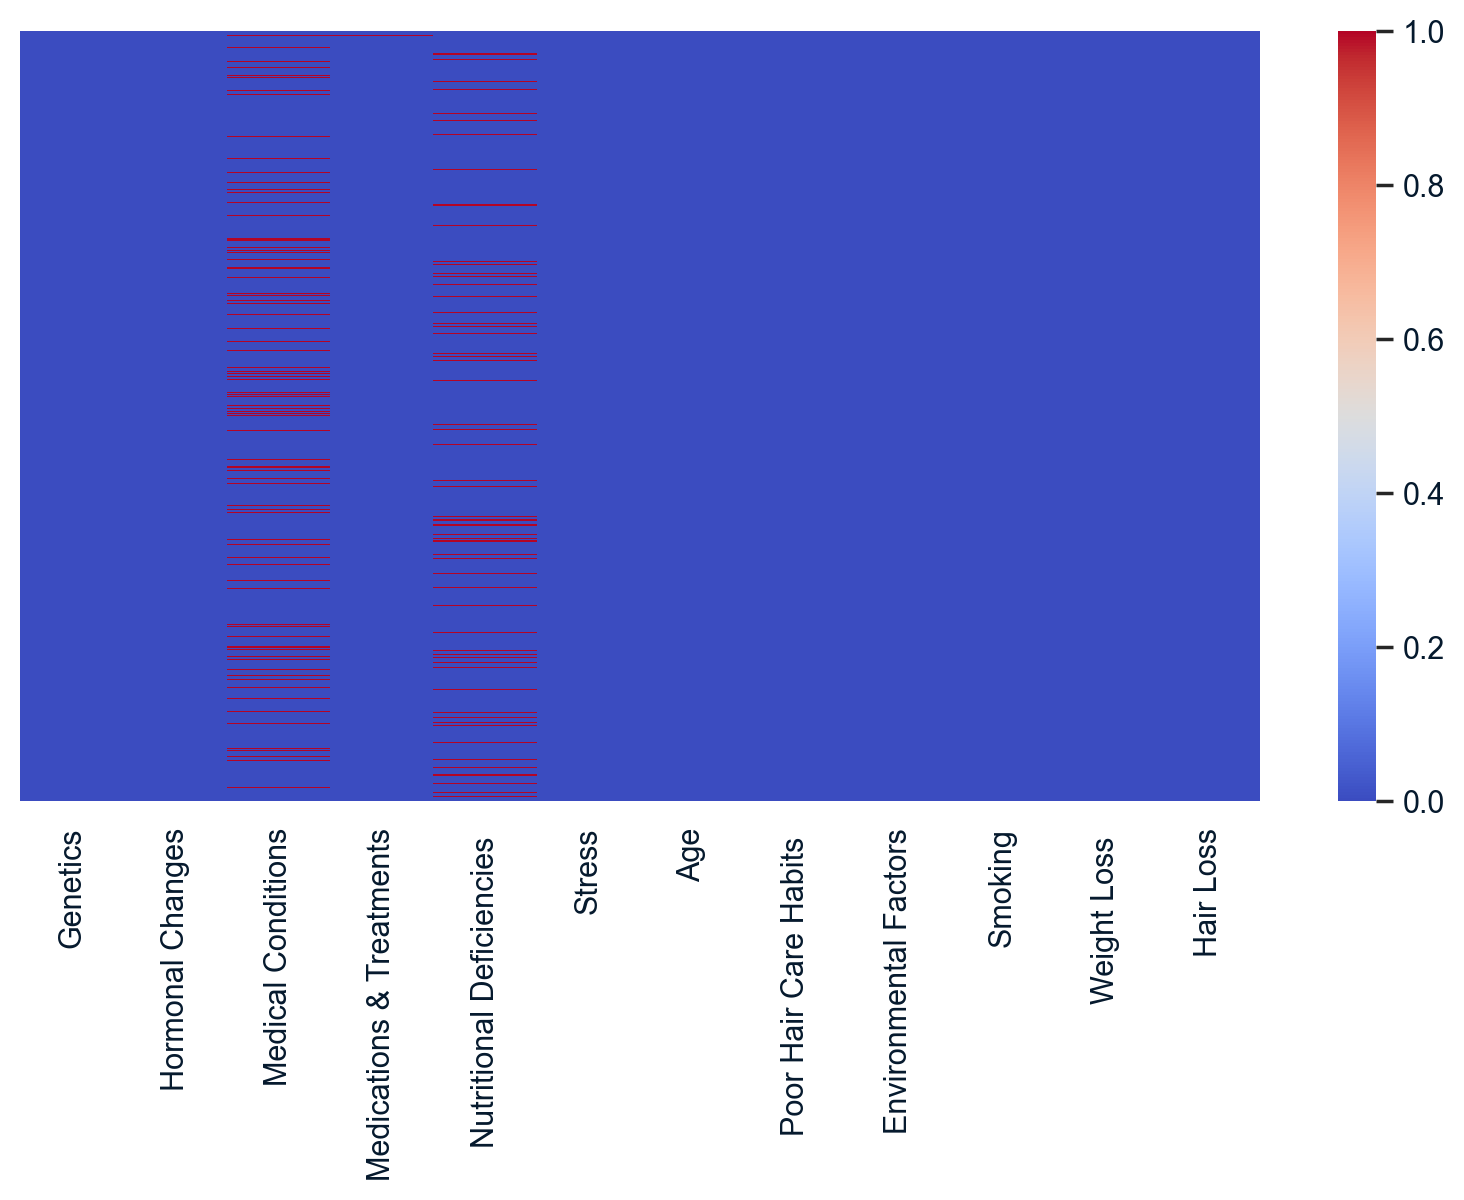

In [92]:
# replacing 'No Data' with Null for easier processing of the missing data
df_non= df.replace('No Data', pd.NA)
#Checking for missing values before cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df_non.isnull(),cmap='coolwarm',yticklabels=False) # visualizing with a heatmap
plt.show()

As previously determined, there are no missing values; however, entries lacking specific information have been marked as 'No Data'.

In [93]:
#checking for "No data" entries
No_Data = df_non.isnull().sum()
No_Data = No_Data[No_Data != 0] #removing rows with no missing values
No_Data=No_Data.reset_index().sort_values(0,ascending=False)
No_Data.rename(columns={'index': 'Columns', 0: 'No Data'}, inplace=True)
No_Data['No Data percentage']= round(No_Data['No Data']*100/len(df),2)
No_Data


,Columns,No Data,No Data percentage
0,Medical Conditions,110,11.01
2,Nutritional Deficiencies,80,8.01
1,Medications & Treatments,2,0.20


In [94]:
#mapping No data to None for better visualization
df.replace('No Data', 'None', inplace=True)

The exploration reveals that entries marked as "No Data" indicate cases where the individual does not have a medical condition, nutritional deficiency, or medication/treatment.The No data has been mapped to None

## 4.0 Exploratory Data Analysis


### 4.1 Target Variable- Hair Loss

The variable 'Hair Loss' is our target variable for predictive analysis.

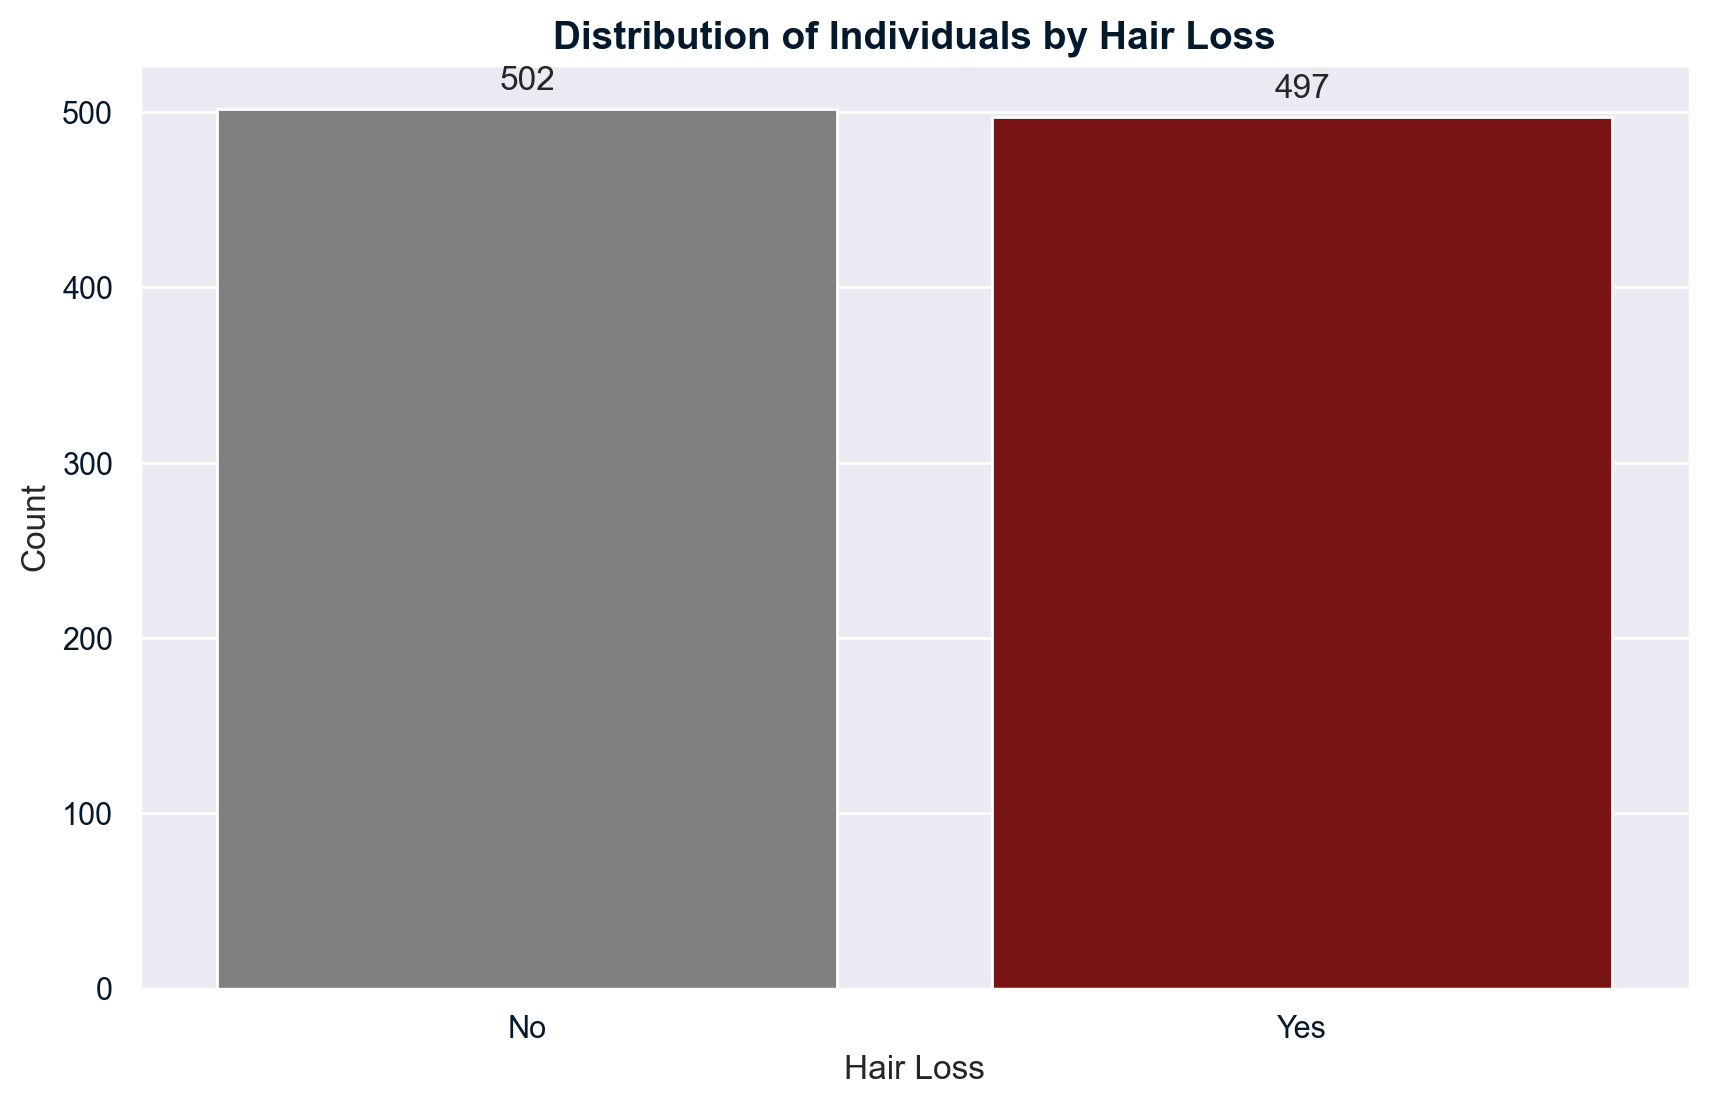

In [95]:
# visualizing the hair loss column
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['Hair Loss'], palette=['gray','#8A0303'],hue=df['Hair Loss'],legend=False)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

# Enhancing title and labels
plt.title('Distribution of Individuals by Hair Loss', fontsize=14, fontweight='bold')
plt.xlabel('Hair Loss', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()

This visualization effectively showcases the proportion of individuals with and without hair loss, revealing an almost equal distribution between the two groups.

### 4.2 Numeric and Categorical Features


#### 4.2.1 Age

Analyzing the age distribution across different hair loss groups.

In [96]:
#looking at the mean and std across the groups
df['Age'].agg(['mean','std']).round().reset_index()

,index,Age
0,mean,34.0
1,std,9.0


The dataset has an average age of 34 years with a standard deviation of 9 years.

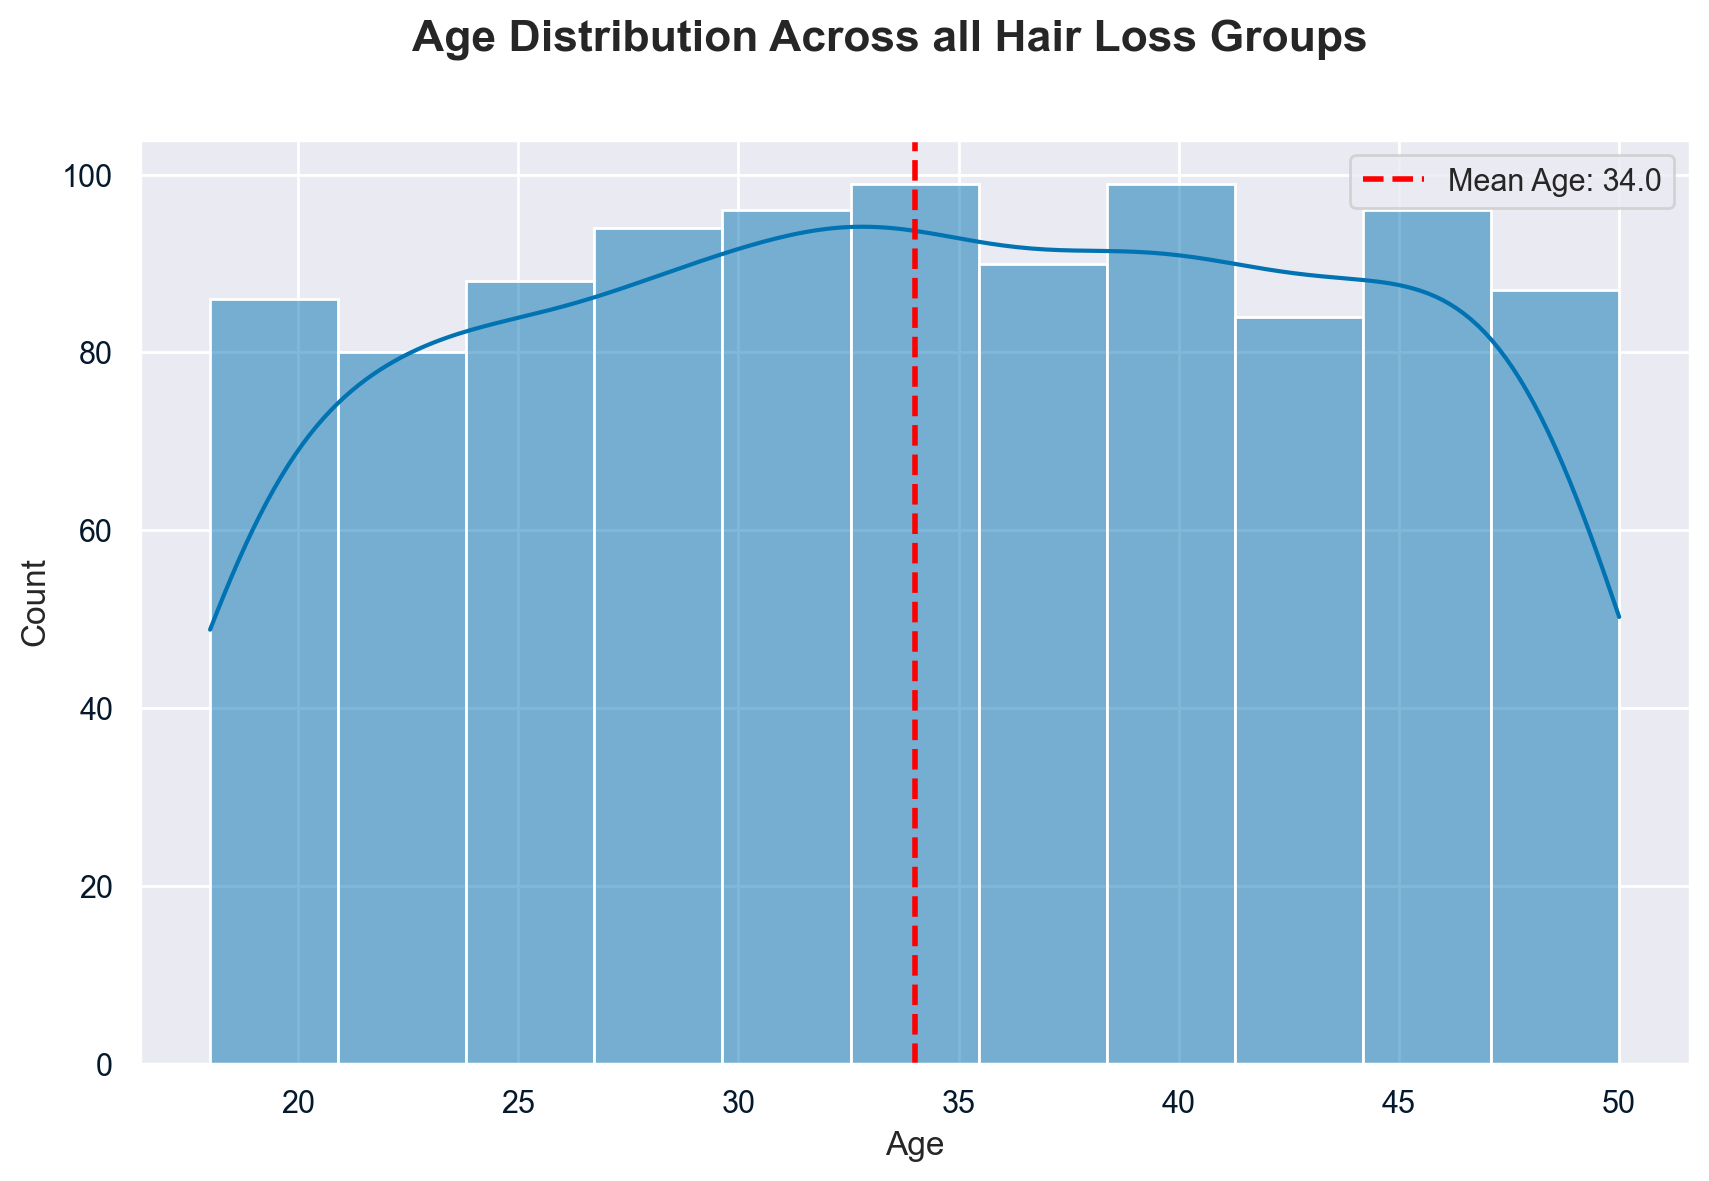

In [97]:
#looking at the age distribution across all groups
plt.figure(figsize=(10, 6))
mean_age= df['Age'].mean().round()
sns.histplot(x='Age', data=df, kde=True)
plt.suptitle('Age Distribution Across all Hair Loss Groups', fontsize=16, fontweight='bold')
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age}')
# Show plot
plt.legend()
plt.show()

The plot visualize the mean age of the dataset

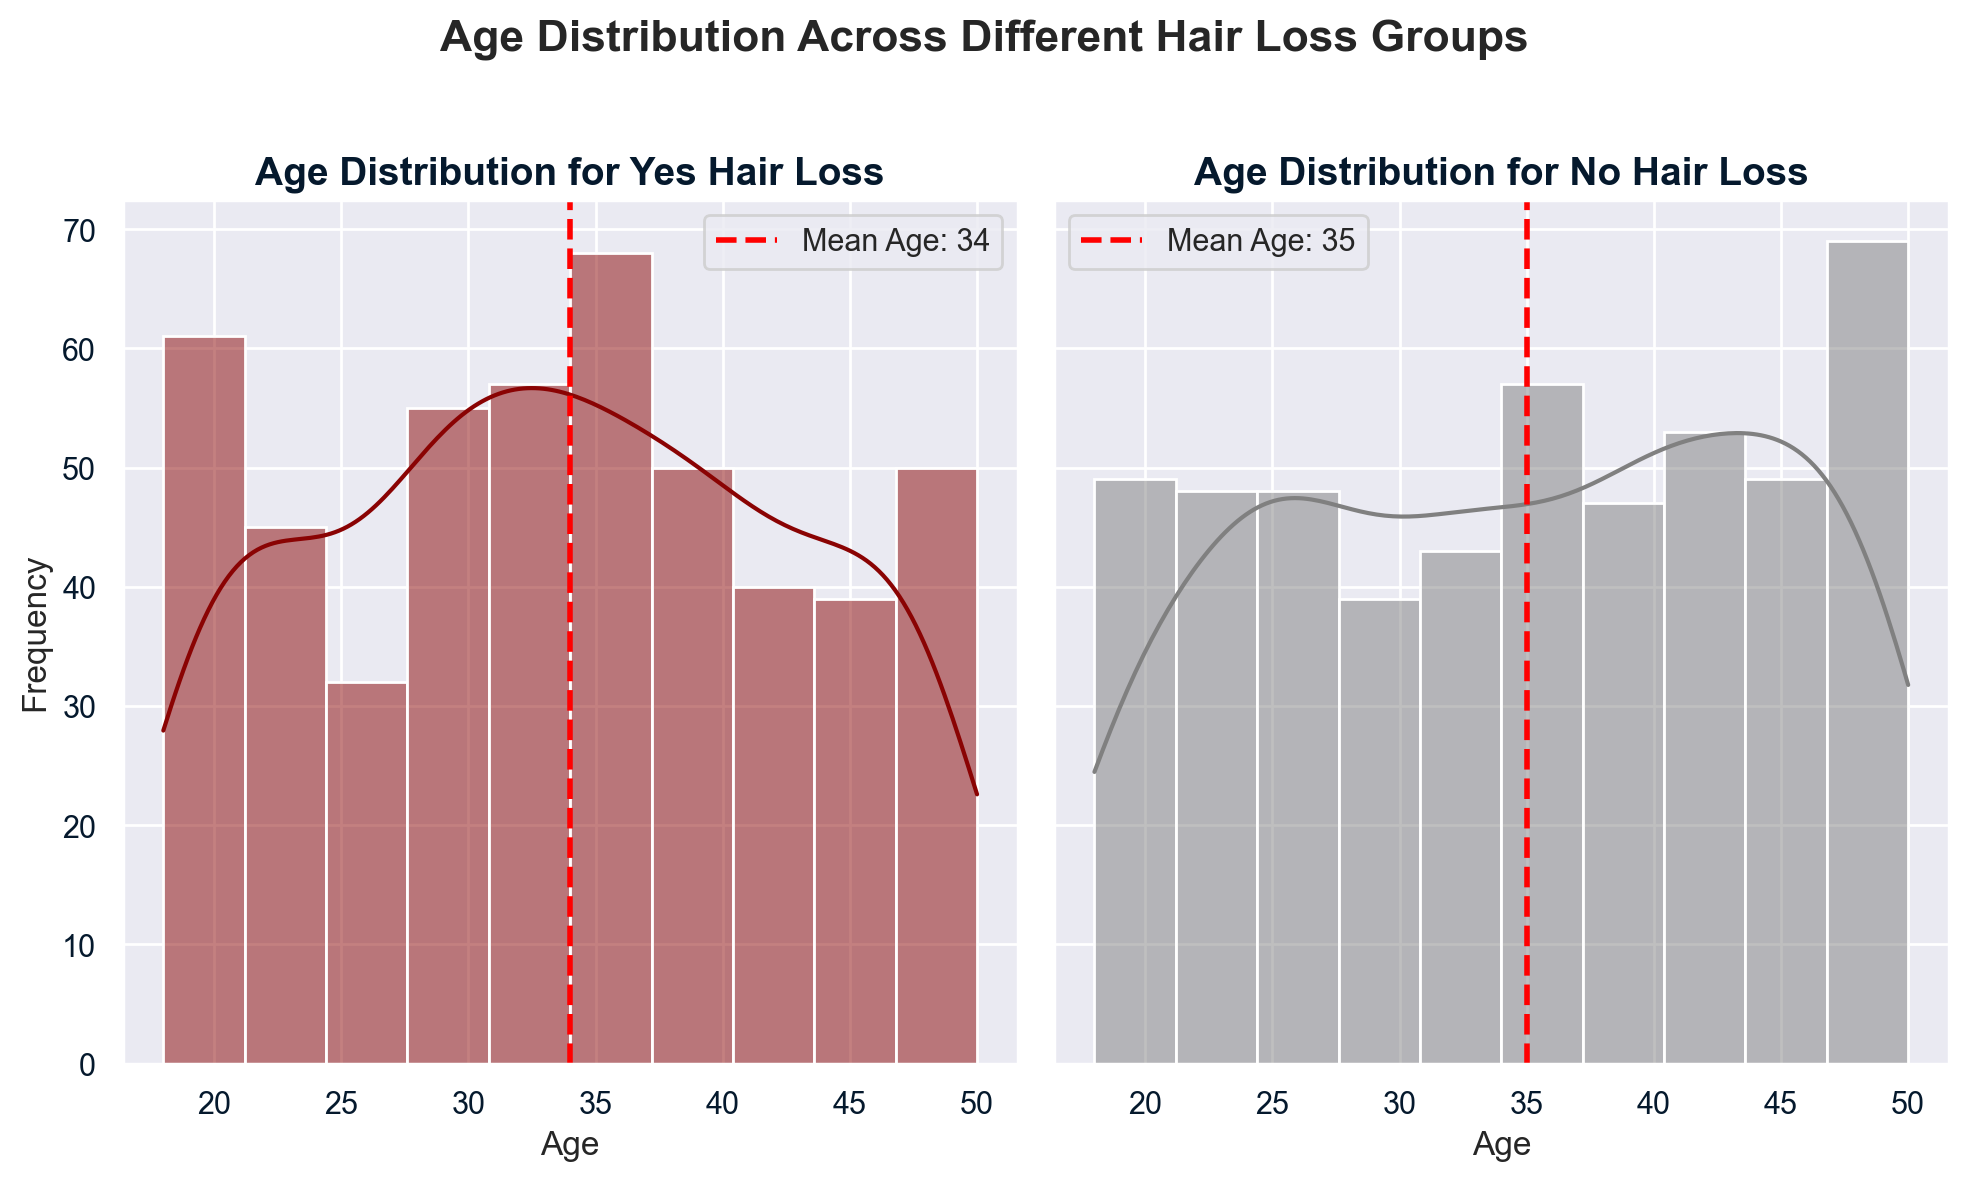

In [98]:
# Defining hair loss groups
hair_groups = ['Yes', 'No']

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plotting each hair loss group in separate subplots
for i, hair in enumerate(hair_groups):
    color = '#8A0303' if hair != 'No' else 'gray'
    group_mean_age = int(round(df[df['Hair Loss'] == hair]['Age'].mean(), 0))
    sns.histplot(ax=axes[i], x='Age', data=df[df['Hair Loss'] == hair], kde=True, color=color)
    axes[i].axvline(group_mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {group_mean_age}')
    axes[i].set_title(f'Age Distribution for {hair} Hair Loss', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Age', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend()

# Enhancing layout
plt.suptitle('Age Distribution Across Different Hair Loss Groups', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()



Here are the key insights from the plot:

- Mean Ages:

    - The mean age for individuals with hair loss is 34 years.

    - The mean age for individuals without hair loss is 35 years.

- Age Distribution Peaks:

    - Hair Loss Group: The age distribution peaks around 30-35 years, indicating a higher frequency of hair loss in this age range.

    - Non-Hair Loss Group: The age distribution is more spread out but shows a noticeable peak around 45-50 years.

- Age Ranges:

    - Both groups have a relatively high frequency of individuals in the 20-25 and 45-50 age ranges.

    - The hair loss group has a more pronounced peak in the 30-35 age range.

The plot highlight the differences in age-related trends for hair loss, showing that individuals with hair loss tend to be younger on average compared to those without hair loss, who exhibit a broader age distribution with a peak in the older age range.

#### 4.2.2 Genetics

Exploring the link between genetic predisposition (family history of baldness) and the occurrence of hair loss.

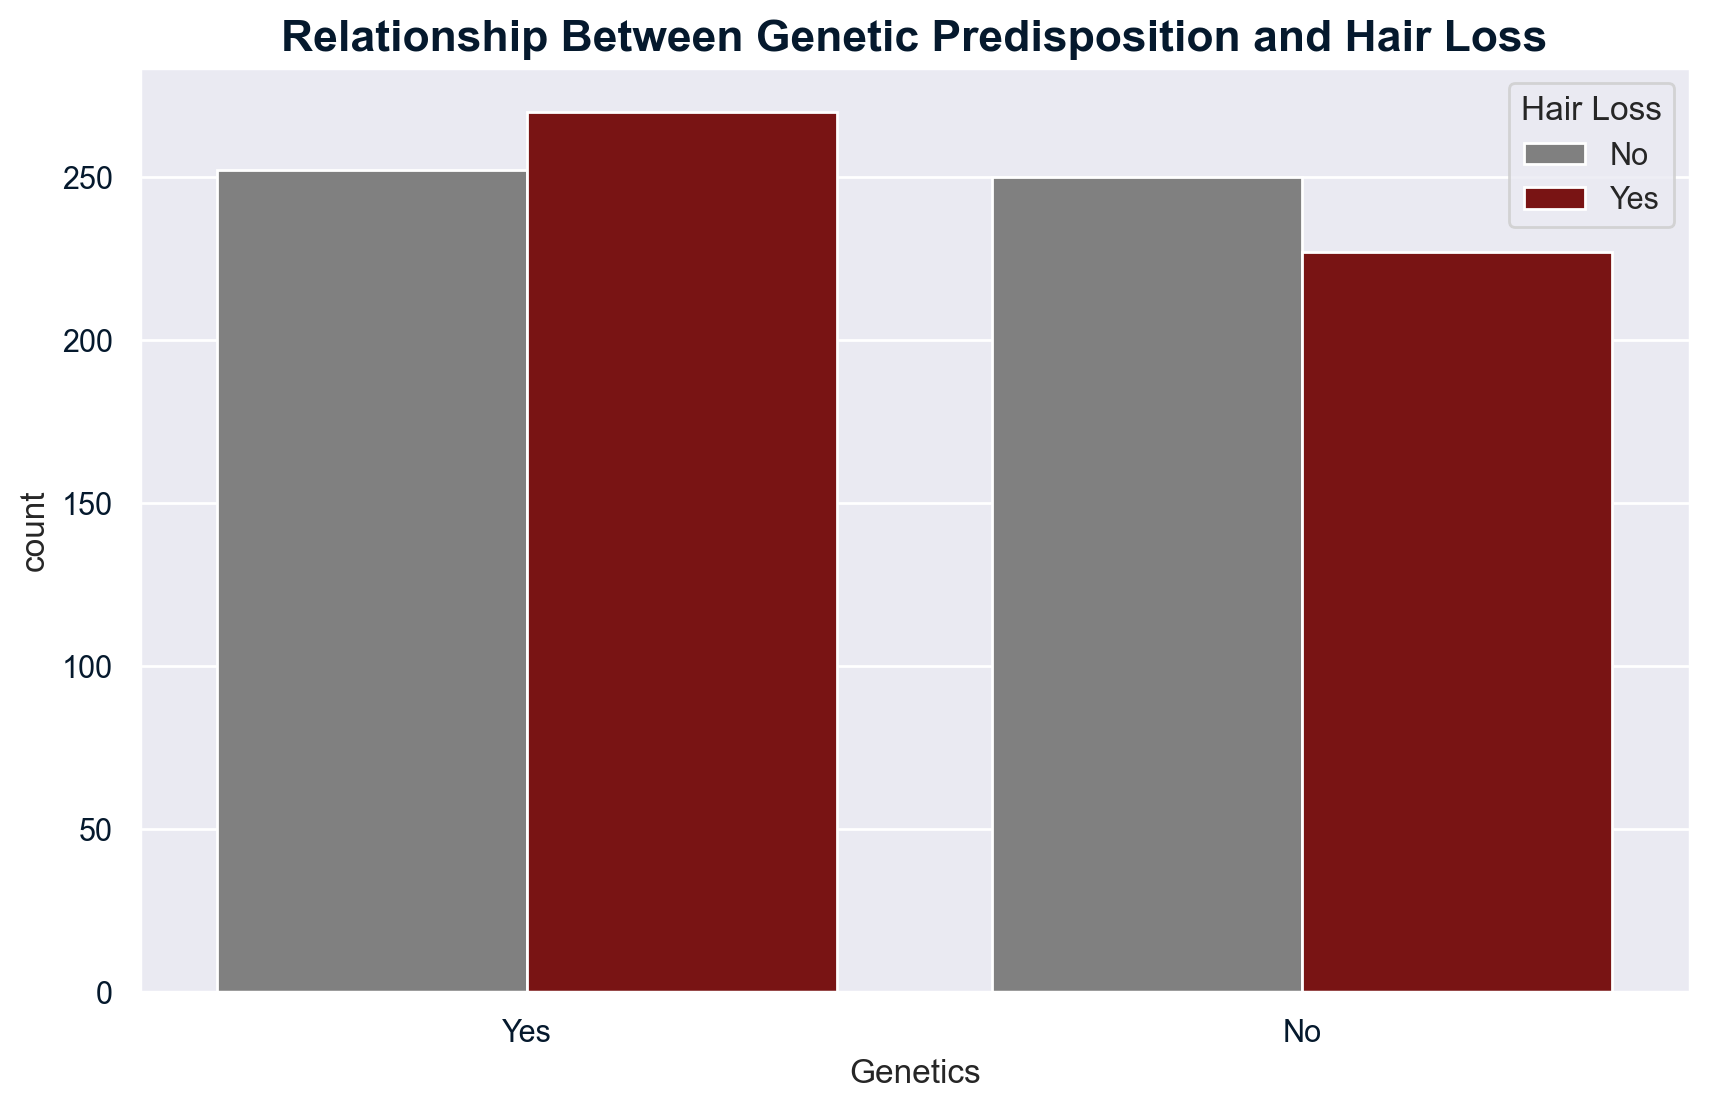

In [99]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Genetics',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between Genetic Predisposition and Hair Loss',fontsize=16, fontweight='bold')
plt.show()

- Genetic Predisposition:

    - Individuals with a genetic predisposition ("Yes") show a higher count of those experiencing hair loss compared to those not experiencing hair loss.

    - Among individuals without a genetic predisposition ("No"), the count of those not experiencing hair loss is higher than those experiencing hair loss.
    
Overall, the plot effectively highlights the influence of genetic factors on hair loss, suggesting that individuals with a family history of baldness are more likely to experience hair loss themselves. This visual representation underscores the importance of genetics in understanding hair loss patterns, exploring further with a statistical test.


#### 4.2.3 Hormonal Changes

Exploring the link between Hormonal Changes and the occurrence of hair loss.

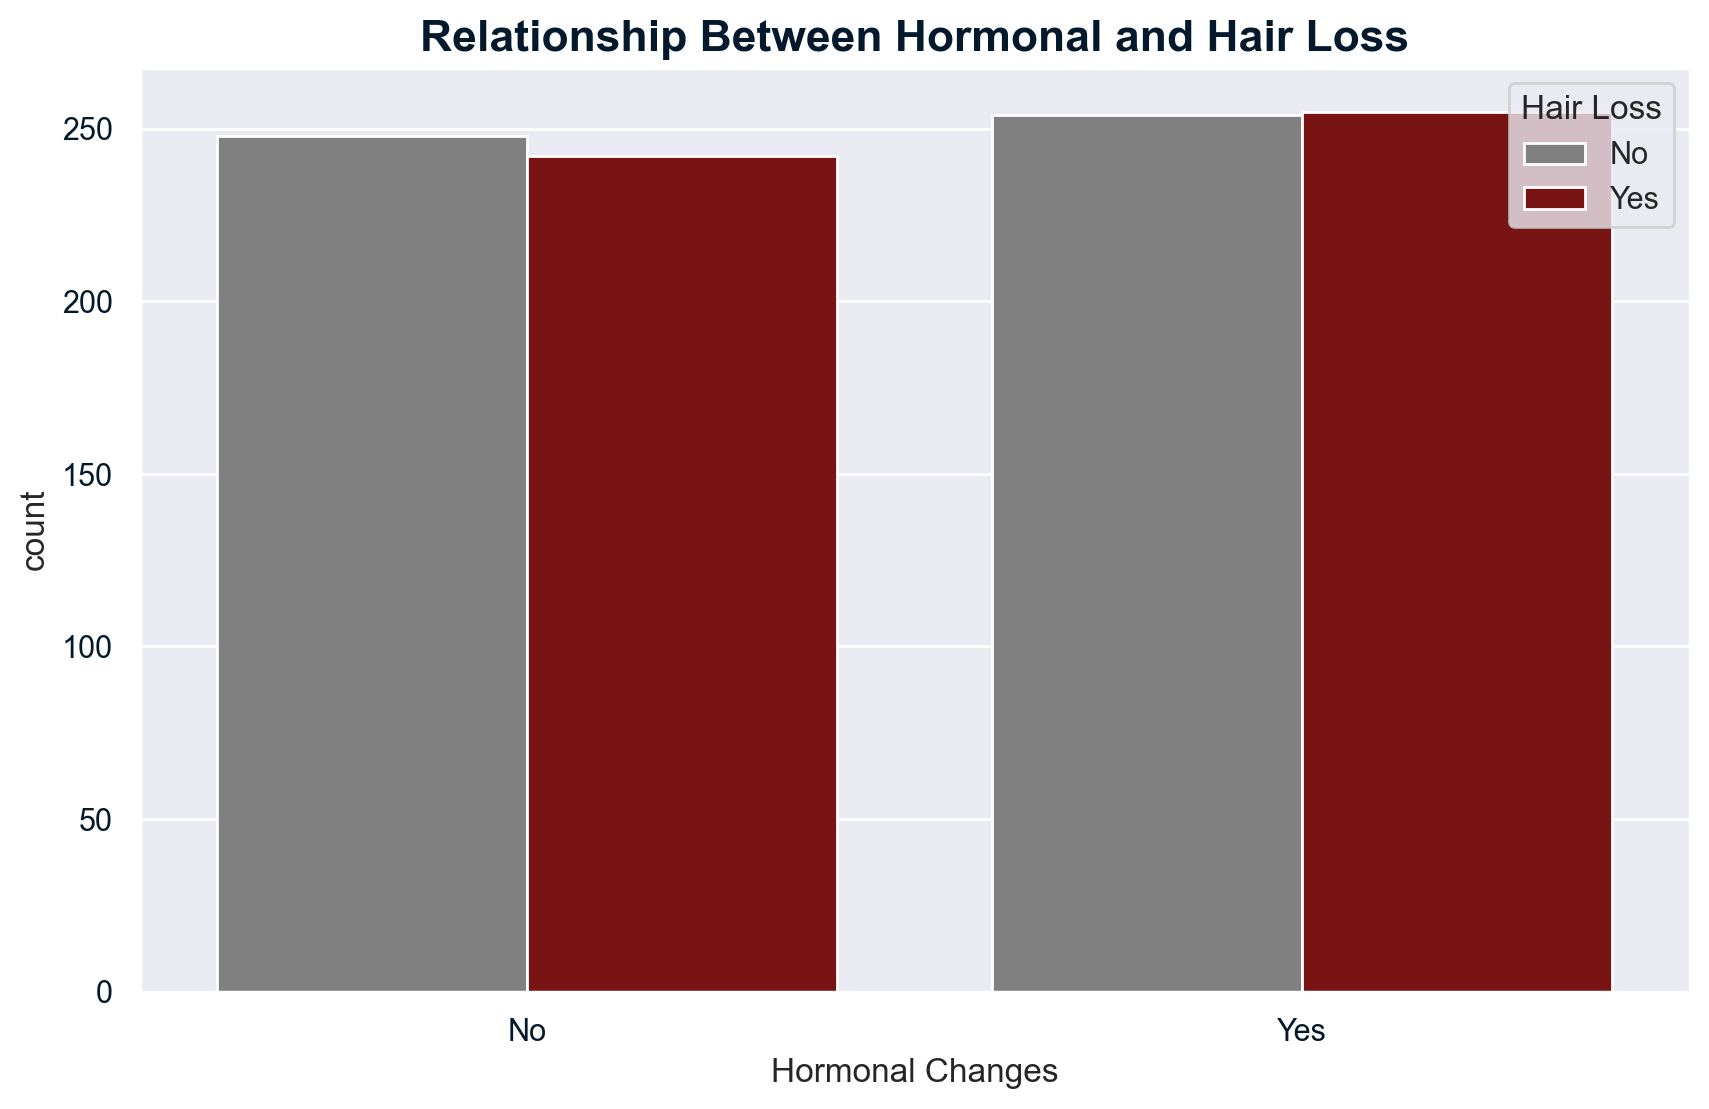

In [100]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Hormonal Changes',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between Hormonal and Hair Loss',fontsize=16, fontweight='bold')
plt.show()


The plot illustrates the connection between hormonal changes and hair loss. Here's a summary of the insights:

- Hair Loss Distribution:

    For individuals with hormonal changes ("Yes"), there are approximately equal counts of those experiencing hair loss and those not experiencing it, each around 250.

    For individuals without hormonal changes ("No"), the distribution is also nearly equal, with around 250 individuals in each category (with and without hair loss).

- Insight:

    There is no significant difference in hair loss between individuals who experience hormonal changes and those who do not. The distribution of hair loss appears to be independent of hormonal changes.

The plot suggests that hormonal changes may not significantly impact the occurrence of hair loss in the dataset analyzed. To explore this relationship further, a statistical test will be conducted.

##### 4.2.3.1  Statistics test

Null Hypothesis (H₀): There is no association between Hormonal changes and hair loss.The occurrence of hair loss is independent of Hormonal Changes.

Alternative Hypothesis (H₁): There is an association between Hormonal changes and hair loss. This means that hormonal changes is related to the likelihood of hair loss.

Significance level =  0.05

In [101]:
chi2_test('Hormonal Changes')

Chi-Square Statistic: 0.026
P-Value: 0.8719


'There is no significant association between Hormonal Changes and hair loss.'

The p-value of 0.8719 is greater than our significance level of 0.05. Consequently, we fail to reject the null hypothesis. This result indicates that there is no statistically significant association between hormonal changes and hair loss. This finding supports our earlier plot, which also suggested that hair loss is not significantly impacted by hormonal changes.

#### 4.2.4 Medical Conditions

Exploring the relationship between certain Medical Conditions and the occurrence of hair loss.

In [102]:
# Grouping the data by Medical Conditions and Hair Loss, and counting occurrences
condition_counts = df.groupby(['Medical Conditions', 'Hair Loss']).size().unstack(fill_value=0)

# Calculating the ratio of Yes to No for each medical condition
condition_counts['Yes %'] = round(condition_counts['Yes'] *100/ (condition_counts['No']+condition_counts['Yes']))

# Display the DataFrame with the ratios
condition_counts[['Yes', 'No', 'Yes %']].sort_values(by='Yes %', ascending=False)

Hair Loss,Yes,No,Yes %
Medical Conditions,,,
Alopecia Areata,61,46,57.0
Seborrheic Dermatitis,50,38,57.0
Androgenetic Alopecia,55,43,56.0
Psoriasis,50,50,50.0
Dermatosis,43,45,49.0
Dermatitis,44,48,48.0
Eczema,33,36,48.0
Ringworm,33,36,48.0
Scalp Infection,38,41,48.0


The table presents the distribution of hair loss cases ("Yes") and no hair loss cases ("No") across various medical conditions, along with the percentage of hair loss cases for each condition ("Yes %").

- Highest Hair Loss Percentage:

    Alopecia Areata and Seborrheic Dermatitis have the highest percentage of hair loss cases at 57.0%.

    Androgenetic Alopecia follows closely with 56.0% of cases experiencing hair loss.

- Lowest Hair Loss Percentage:

    None (no medical condition) and Thyroid Problems have the lowest hair loss percentage at 43.0%.


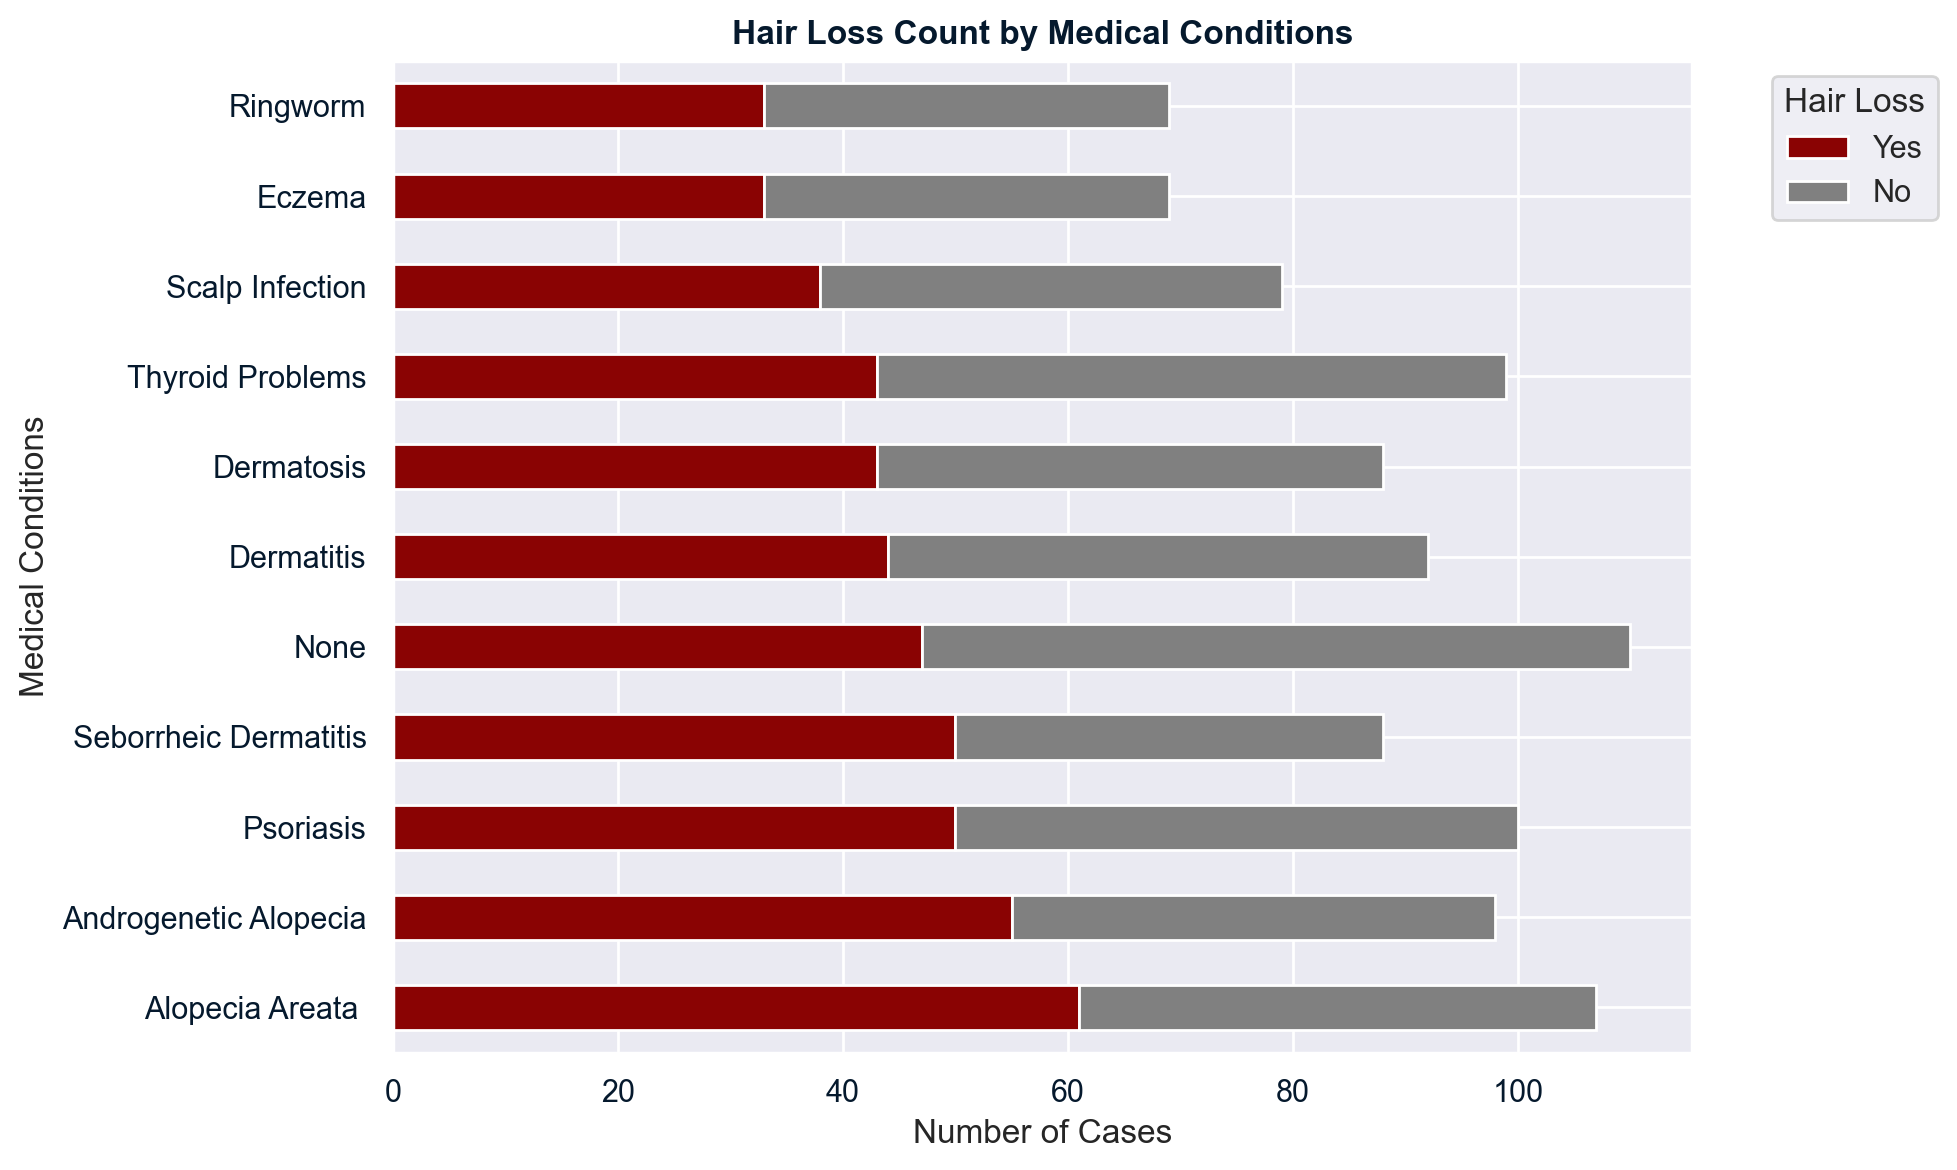

In [103]:
# Grouping the data by medical condition and hair loss, and counting occurrences
condition_counts = df.groupby(['Medical Conditions', 'Hair Loss']).size().unstack(fill_value=0)

# Reordering the columns so that "Yes" comes before "No"
condition_counts = condition_counts[['Yes', 'No']]

# Adding a new column for sorting based on 'Yes' counts
condition_counts['Total Yes'] = condition_counts['Yes']

# Sorting the DataFrame by 'Total Yes' in descending order
condition_counts = condition_counts.sort_values(by='Total Yes', ascending=False)

# Removing the 'Total Yes' column as it's no longer needed
condition_counts = condition_counts.drop(columns='Total Yes')

# Plotting the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
condition_counts.plot(kind='barh', stacked=True, ax=ax, color=['#8A0303', 'gray'])

# Customizing the plot
plt.title("Hair Loss Count by Medical Conditions", weight='bold')
plt.xlabel("Number of Cases")  # Adding the x-label for clarity
plt.ylabel("Medical Conditions")
plt.legend(title="Hair Loss", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The horizontal bar chart visualizes the distribution of hair loss cases (Yes) and no hair loss cases (No) across various medical conditions. The data provides the following insights:

- High Association with Hair Loss:

    Androgenetic Alopecia and Alopecia Areata exhibit a significant number of hair loss cases compared to other conditions, indicating a strong correlation between these conditions and hair loss.

    High Association with No Hair Loss:

    People with No medical condition and Thyroid Problems have a higher number of cases with no hair loss, suggesting these conditions are less likely to be associated with hair loss.

- Balanced Distribution:

    Conditions like Ringworm, Eczema, Scalp Infection, Dermatosis, and Seborrheic Dermatitis show a relatively balanced distribution between cases with and without hair loss.


The plot clearly highlights the medical conditions that are more closely related to hair loss. Androgenetic Alopecia and Alopecia Areata stand out as the conditions with the most significant impact on hair loss.

Conversely, No medical condition and Thyroid Problems are more associated with a lack of hair loss.

#### 4.2.5 Medications & Treatments

Exploring the link between Medications and the occurrence of hair loss.

In [104]:
# Grouping the data by Medications & Treatments and Hair Loss, and counting occurrences
condition_counts = df.groupby(['Medications & Treatments', 'Hair Loss']).size().unstack(fill_value=0)

# Calculating the ratio of Yes to No for each Medications & Treatments
condition_counts['Yes %'] = round(condition_counts['Yes'] *100/ (condition_counts['No']+condition_counts['Yes']))

# Display the DataFrame with the ratios
condition_counts[['Yes', 'No', 'Yes %']].sort_values(by='Yes %', ascending=False)

Hair Loss,Yes,No,Yes %
Medications & Treatments,,,
Steroids,59,48,55.0
Antibiotics,50,44,53.0
Chemotherapy,46,44,51.0
Heart Medication,53,51,51.0
Rogaine,59,57,51.0
None,1,1,50.0
Accutane,50,52,49.0
Antidepressants,53,57,48.0
Antifungal Cream,44,50,47.0


Chemotherapy and steroids are strongly linked to hair loss, with 55% of individuals using steroids experiencing this side effect. In contrast, blood pressure medications and immunomodulators have the lowest association with hair loss.

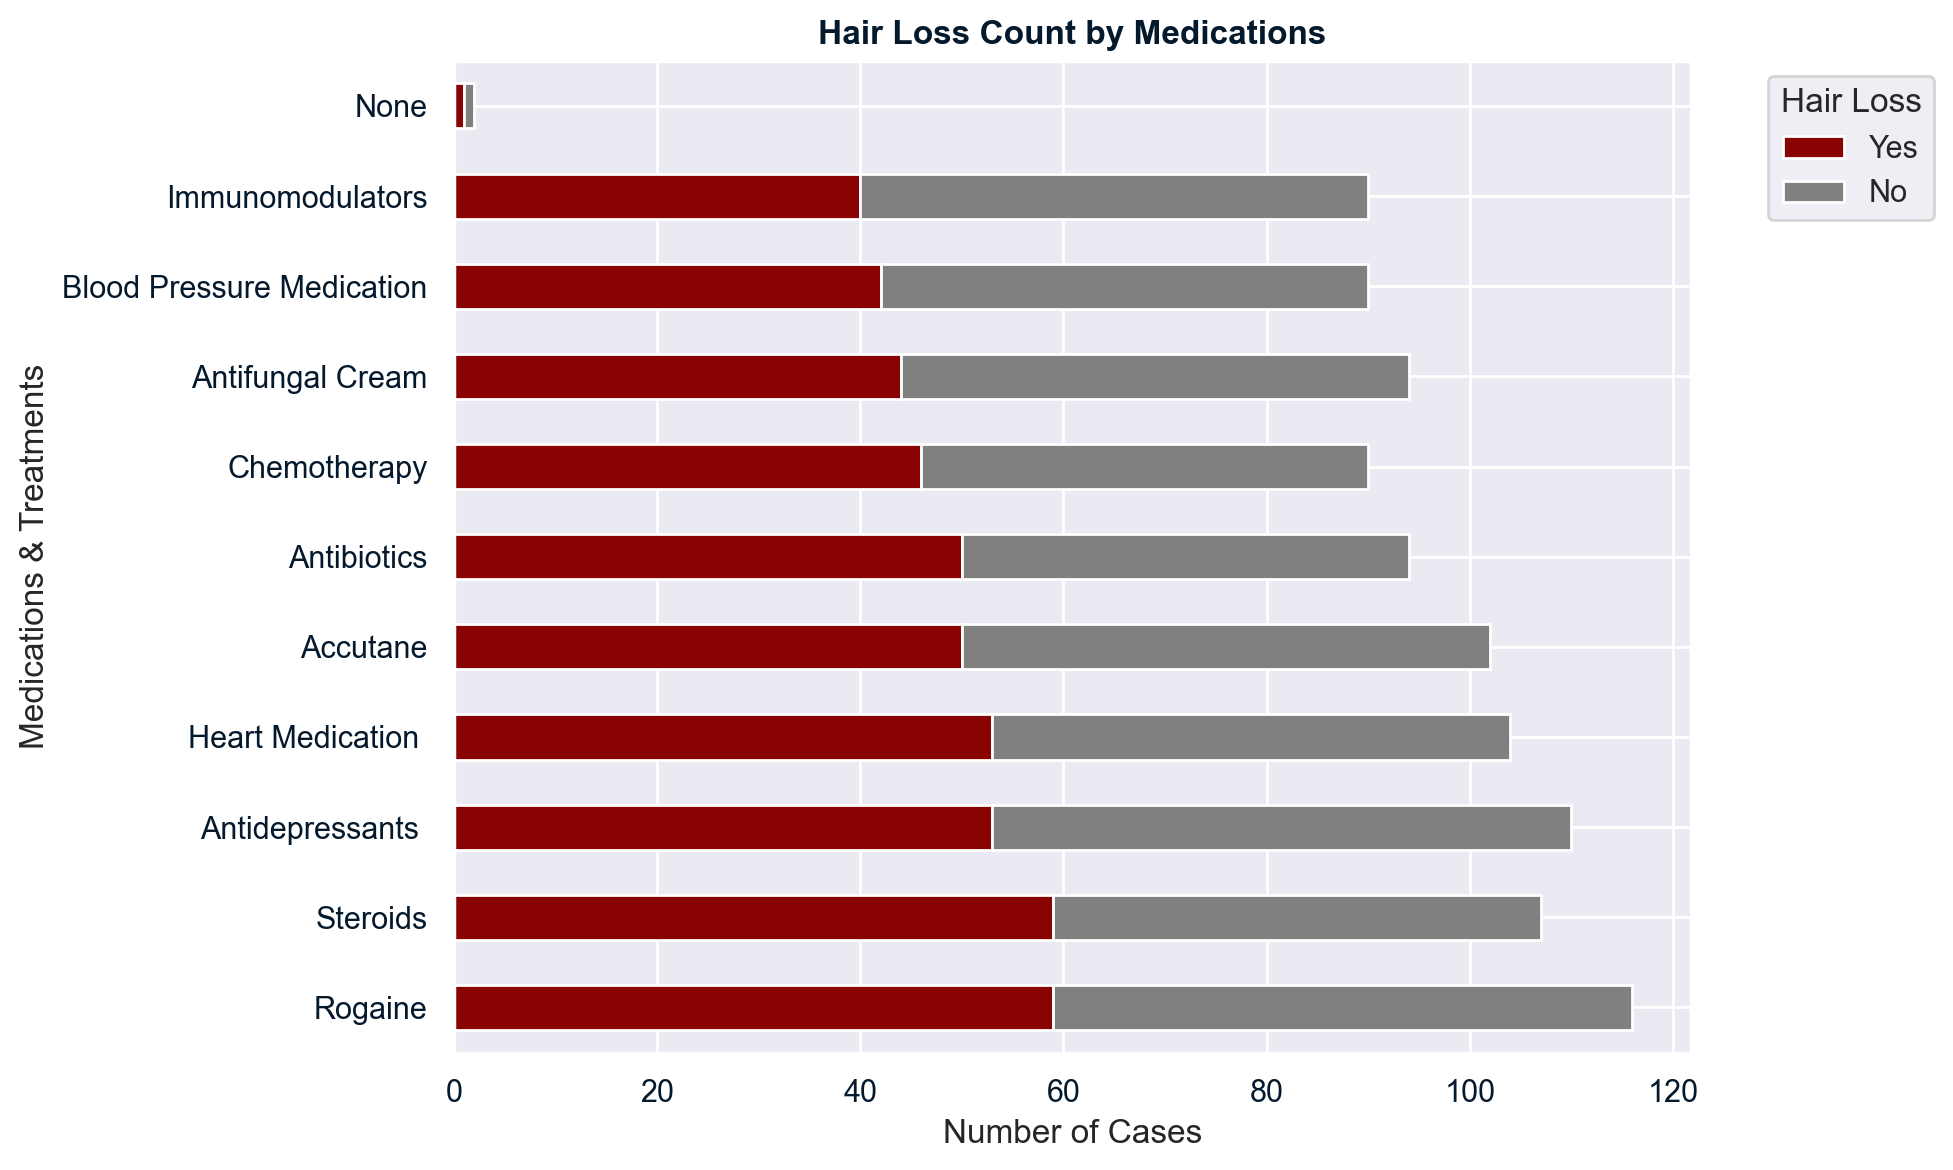

In [105]:
# Grouping the data by Medications and hair loss, and counting occurrences
condition_counts = df.groupby(['Medications & Treatments', 'Hair Loss']).size().unstack(fill_value=0)

# Reordering the columns so that "Yes" comes before "No"
condition_counts = condition_counts[['Yes', 'No']]

# Adding a new column for sorting based on 'Yes' counts
condition_counts['Total Yes'] = condition_counts['Yes']

# Sorting the DataFrame by 'Total Yes' in descending order
condition_counts = condition_counts.sort_values(by='Total Yes', ascending=False)

# Removing the 'Total Yes' column as it's no longer needed
condition_counts = condition_counts.drop(columns='Total Yes')

# Plotting the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
condition_counts.plot(kind='barh', stacked=True, ax=ax, color=['#8A0303', 'gray'])

# Customizing the plot
plt.title("Hair Loss Count by Medications", weight='bold')
plt.xlabel("Number of Cases")  # Adding the x-label for clarity
plt.ylabel("Medications & Treatments")
plt.legend(title="Hair Loss", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Medications like Steroids, Antidepressants, and Rogaine are linked to hair loss, they have a high hair loss count.

#### 4.2.6 Nutritional Deficiencies

Exploring the relationship between Nutritional Deficiencies and the occurrence of hair loss.

In [106]:
# Grouping the data by Nutritional Deficiencies and Hair Loss, and counting occurrences
condition_counts = df.groupby(['Nutritional Deficiencies ', 'Hair Loss']).size().unstack(fill_value=0)

# Calculating the ratio of Yes to No for each Nutritional Deficiencies
condition_counts['Yes %'] = round(condition_counts['Yes'] *100/ (condition_counts['No']+condition_counts['Yes']))

# Display the DataFrame with the ratios
condition_counts[['Yes', 'No', 'Yes %']].sort_values(by='Yes %', ascending=False)

Hair Loss,Yes,No,Yes %
Nutritional Deficiencies,,,
Magnesium deficiency,46,38,55.0
None,42,38,52.0
Protein deficiency,47,43,52.0
Vitamin A Deficiency,51,48,52.0
Iron deficiency,40,38,51.0
Selenium deficiency,42,40,51.0
Vitamin D Deficiency,52,52,50.0
Zinc Deficiency,51,57,47.0
Biotin Deficiency,46,53,46.0


Magnesium deficiency had the highest percentage, but the percentages for the various deficiencies are quite close.

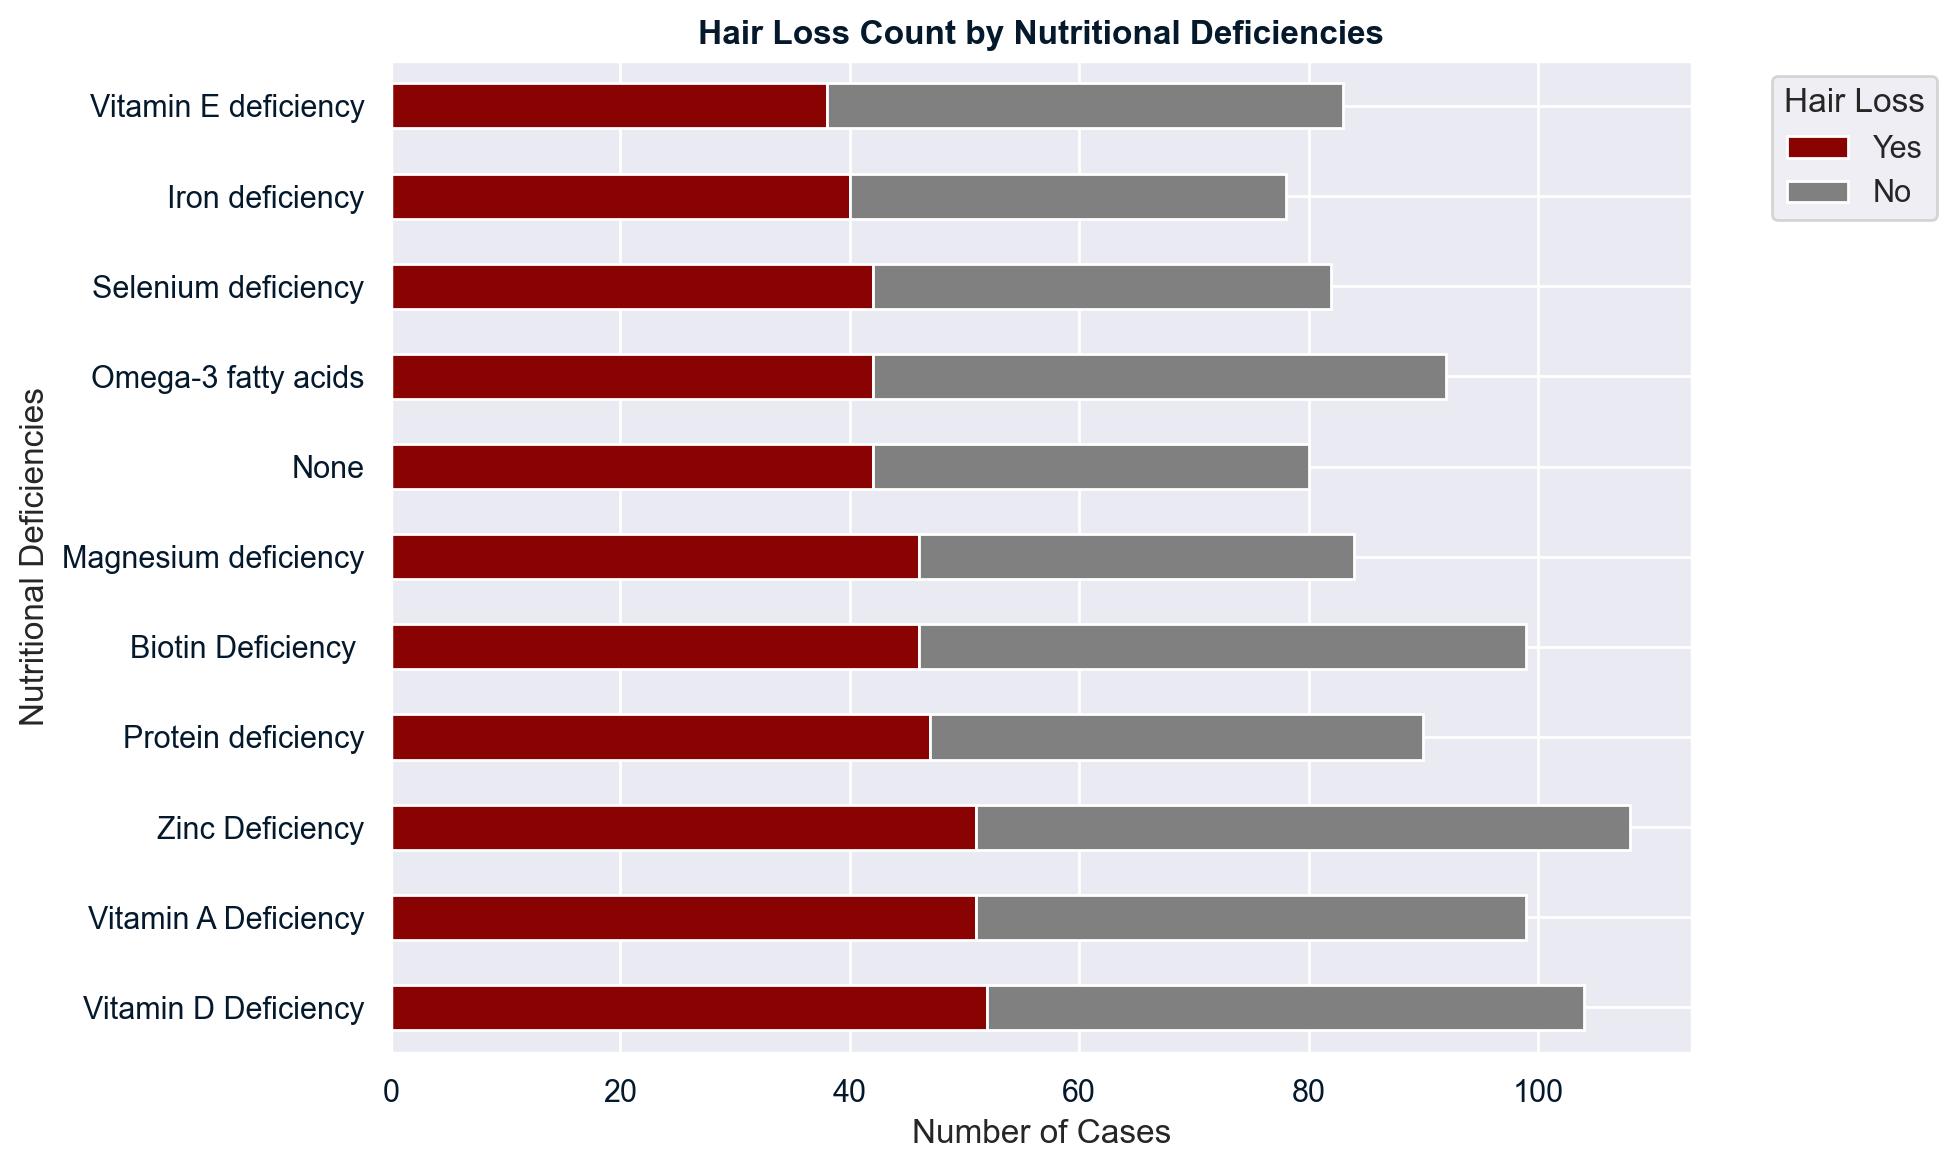

In [107]:
# Grouping the data by Nutritional Deficiencies and hair loss, and counting occurrences
condition_counts = df.groupby(['Nutritional Deficiencies ', 'Hair Loss']).size().unstack(fill_value=0)

# Reordering the columns so that "Yes" comes before "No"
condition_counts = condition_counts[['Yes', 'No']]

# Adding a new column for sorting based on 'Yes' counts
condition_counts['Total Yes'] = condition_counts['Yes']

# Sorting the DataFrame by 'Total Yes' in descending order
condition_counts = condition_counts.sort_values(by='Total Yes', ascending=False)

# Removing the 'Total Yes' column as it's no longer needed
condition_counts = condition_counts.drop(columns='Total Yes')

# Plotting the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
condition_counts.plot(kind='barh', stacked=True, ax=ax, color=['#8A0303', 'gray'])

# Customizing the plot
plt.title("Hair Loss Count by Nutritional Deficiencies", weight='bold')
plt.xlabel("Number of Cases")  # Adding the x-label for clarity
plt.ylabel("Nutritional Deficiencies")
plt.legend(title="Hair Loss", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The plot shows that the counts of hair loss and no hair loss are quite similar across the different nutritional deficiencies. To determine if there is a significant relationship between these factors, a statistical test will be performed.

##### 4.2.6.1  Statistics test

Null Hypothesis (H₀): There is no association between Nutritional deficiencies and hair loss.The occurrence of hair loss is independent of Nutritional deficiencies

Alternative Hypothesis (H₁): There is an association between Nutricial deficiencies and hair loss. This means that nutrional deficiencies is related to the likelihood of hair loss.

Significance level =  0.05

In [108]:
chi2_test('Nutritional Deficiencies ')

Chi-Square Statistic: 3.42
P-Value: 0.9697


'There is no significant association between Nutritional Deficiencies  and hair loss.'

The p-value of 0.9697 is greater than our significance level of 0.05. Consequently, we fail to reject the null hypothesis. This result indicates that there is no statistically significant association between nutritional deficiences and hair loss.

#### 4.2.7 Stress

Exploring the relationship between Stress and the occurrence of hair loss.

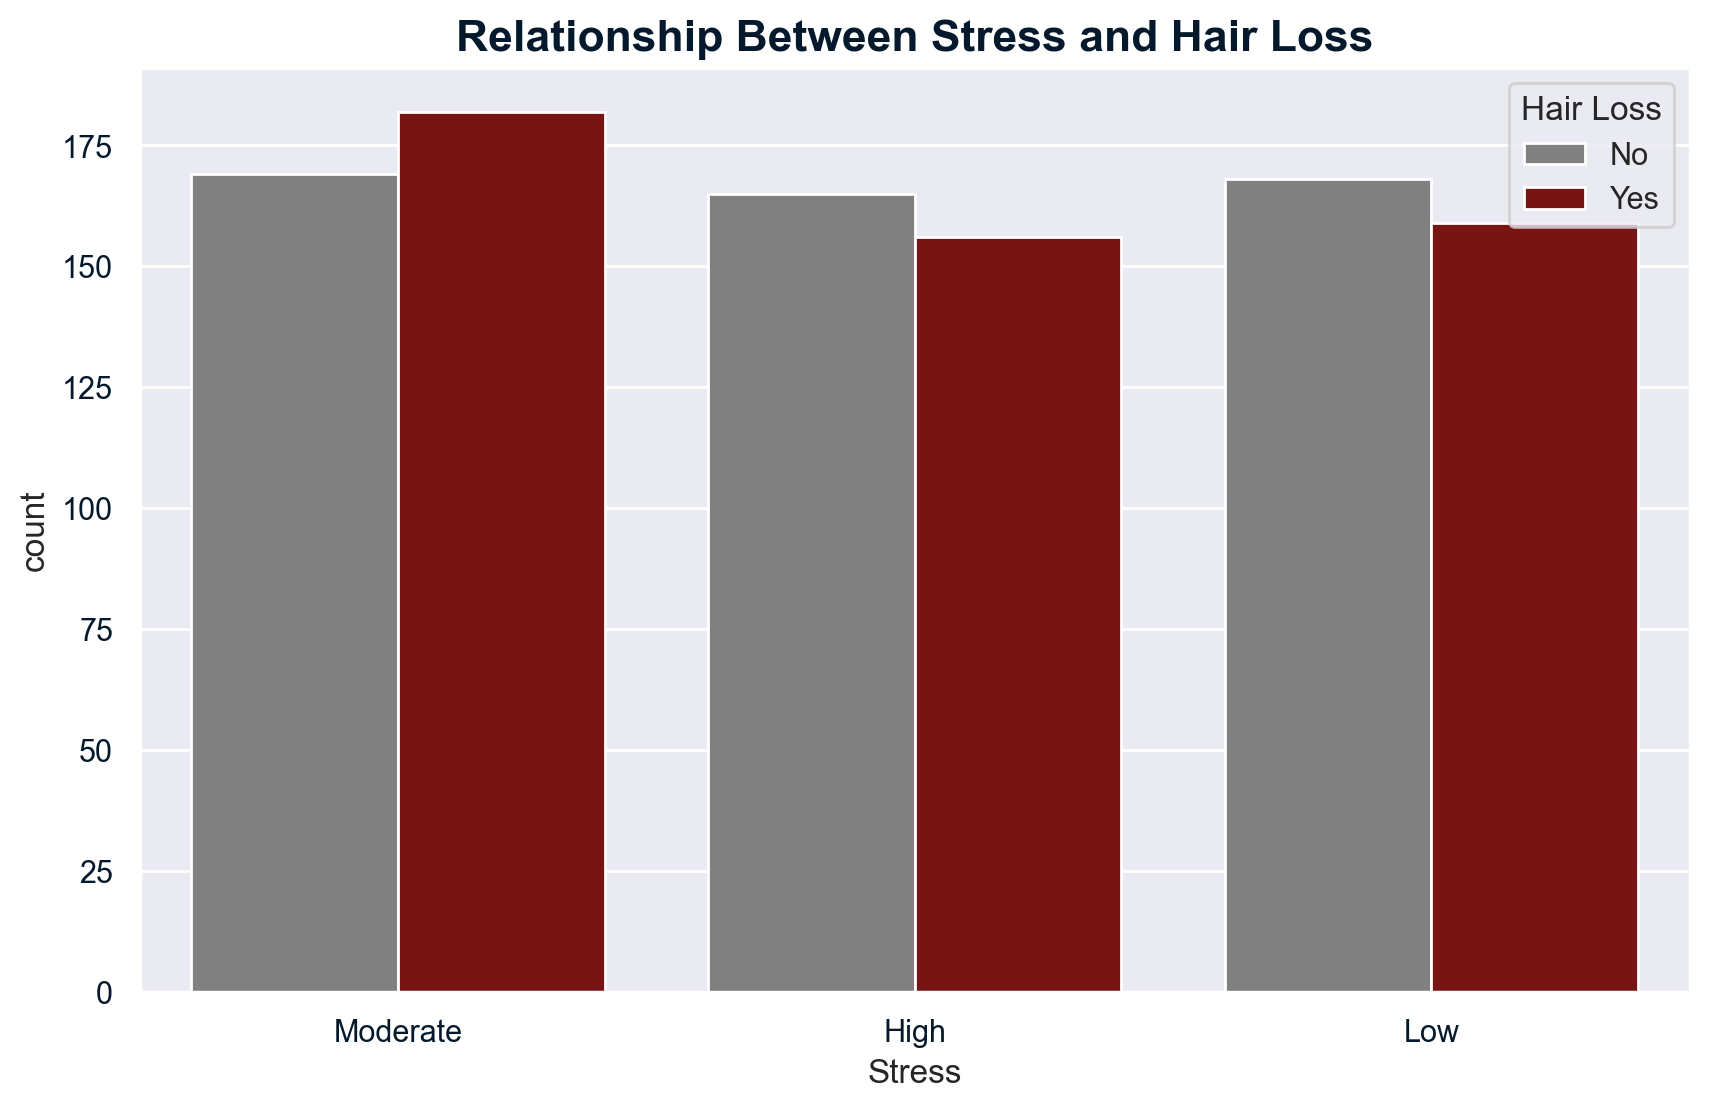

In [109]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between Stress and Hair Loss',fontsize=16, fontweight='bold')
plt.show()

This plot visually suggests that moderate stress might be associated with a higher incidence of hair loss compared to high and low stress levels. The data provides an interesting perspective on how different stress levels could potentially influence hair loss

#### 4.2.8 Poor Hair Care Habits

Exploring the relationship between Poor Hair Care Habits and the occurrence of hair loss.

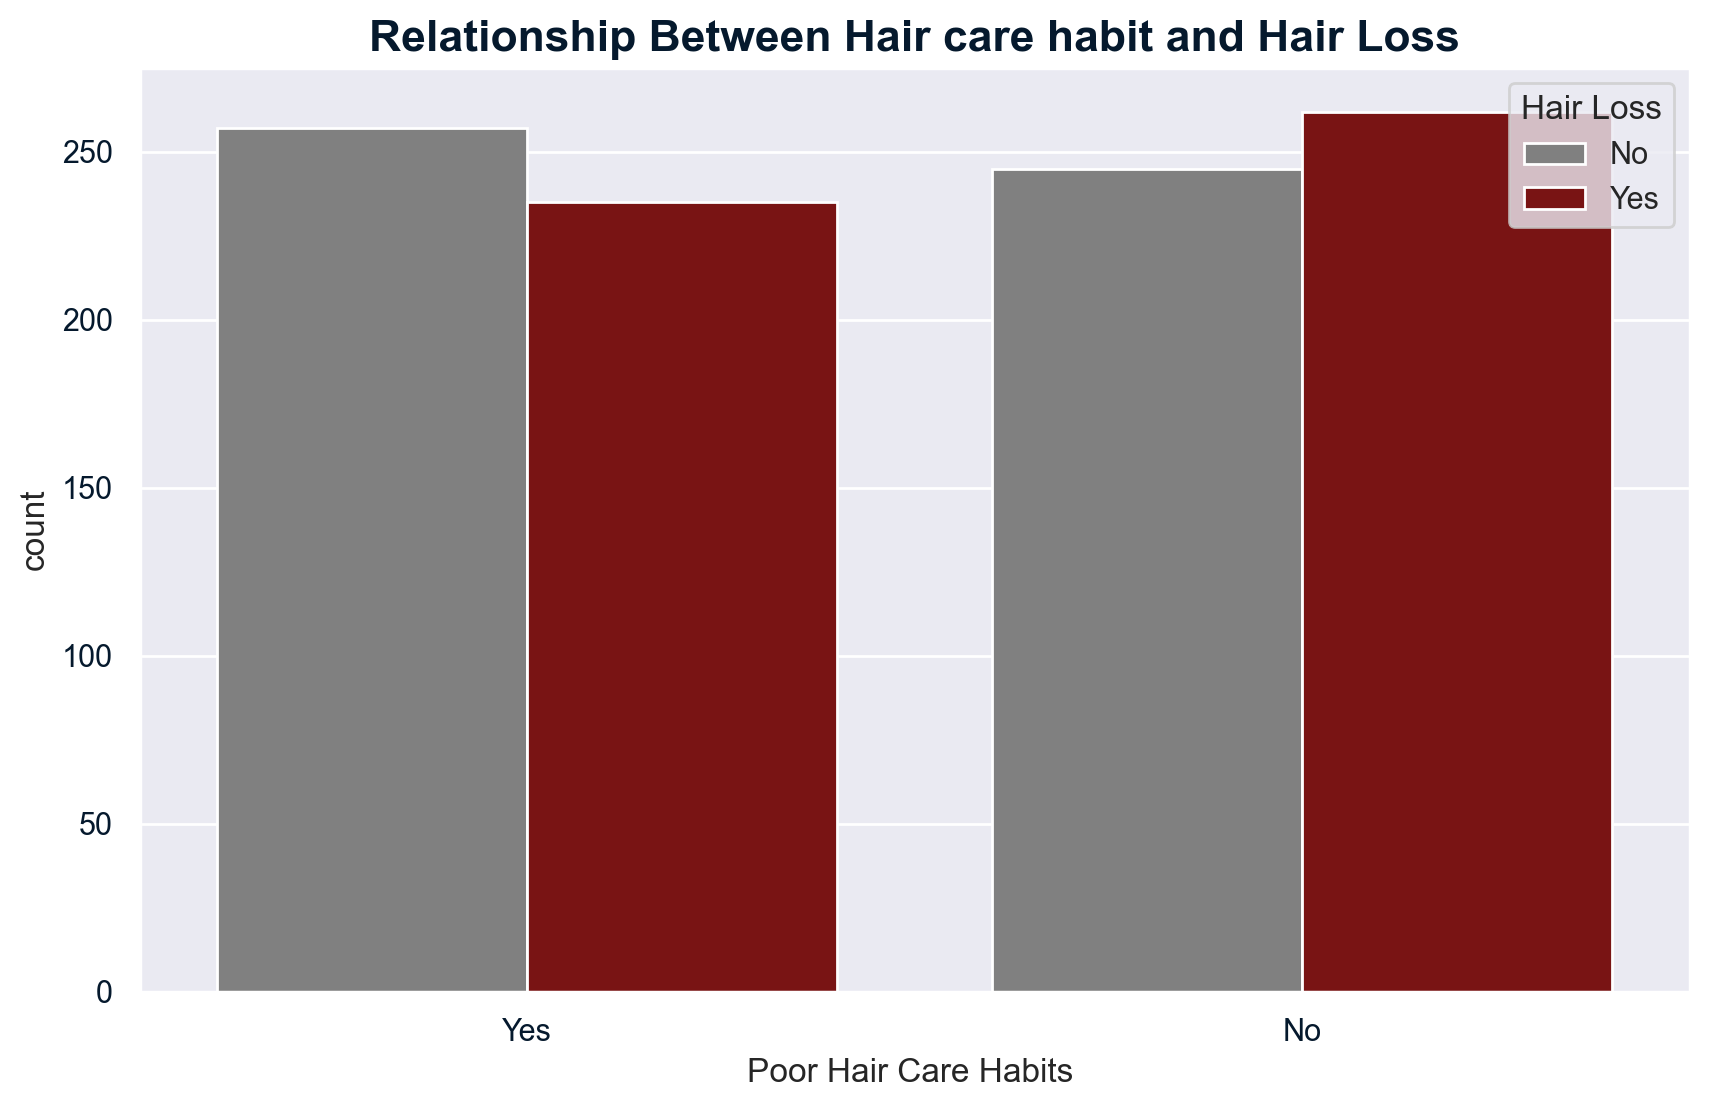

In [110]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Poor Hair Care Habits ',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between Hair care habit and Hair Loss',fontsize=16, fontweight='bold')
plt.show()

This plot suggests that poor hair care habits do not have a clear, strong correlation with hair loss

#### 4.2.8 Environmental Factors

Exploring the relationship between Environmental Factors and the occurrence of hair loss.

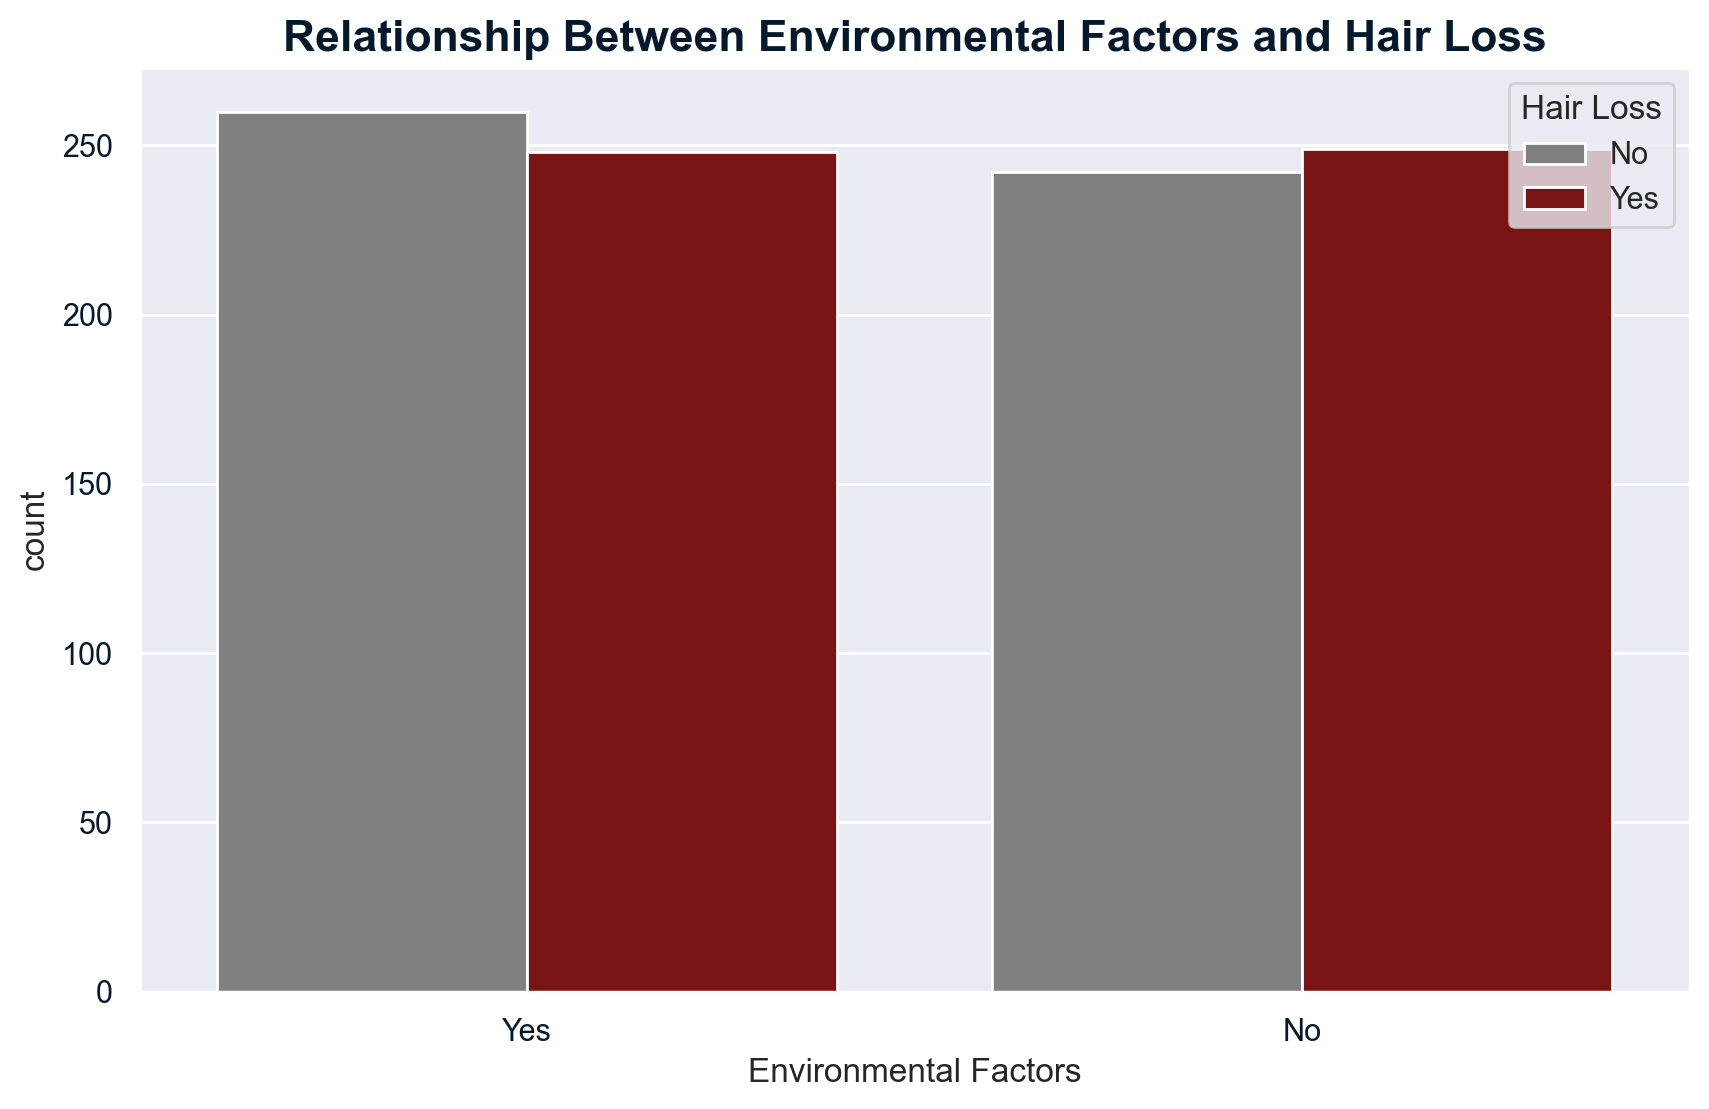

In [111]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Environmental Factors',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between Environmental Factors and Hair Loss',fontsize=16, fontweight='bold')
plt.show()


This plot suggests that environmental factors do not have a clear, strong correlation with hair loss

#### 4.2.9 Smoking

Exploring the relationship between smoking and the occurrence of hair loss.

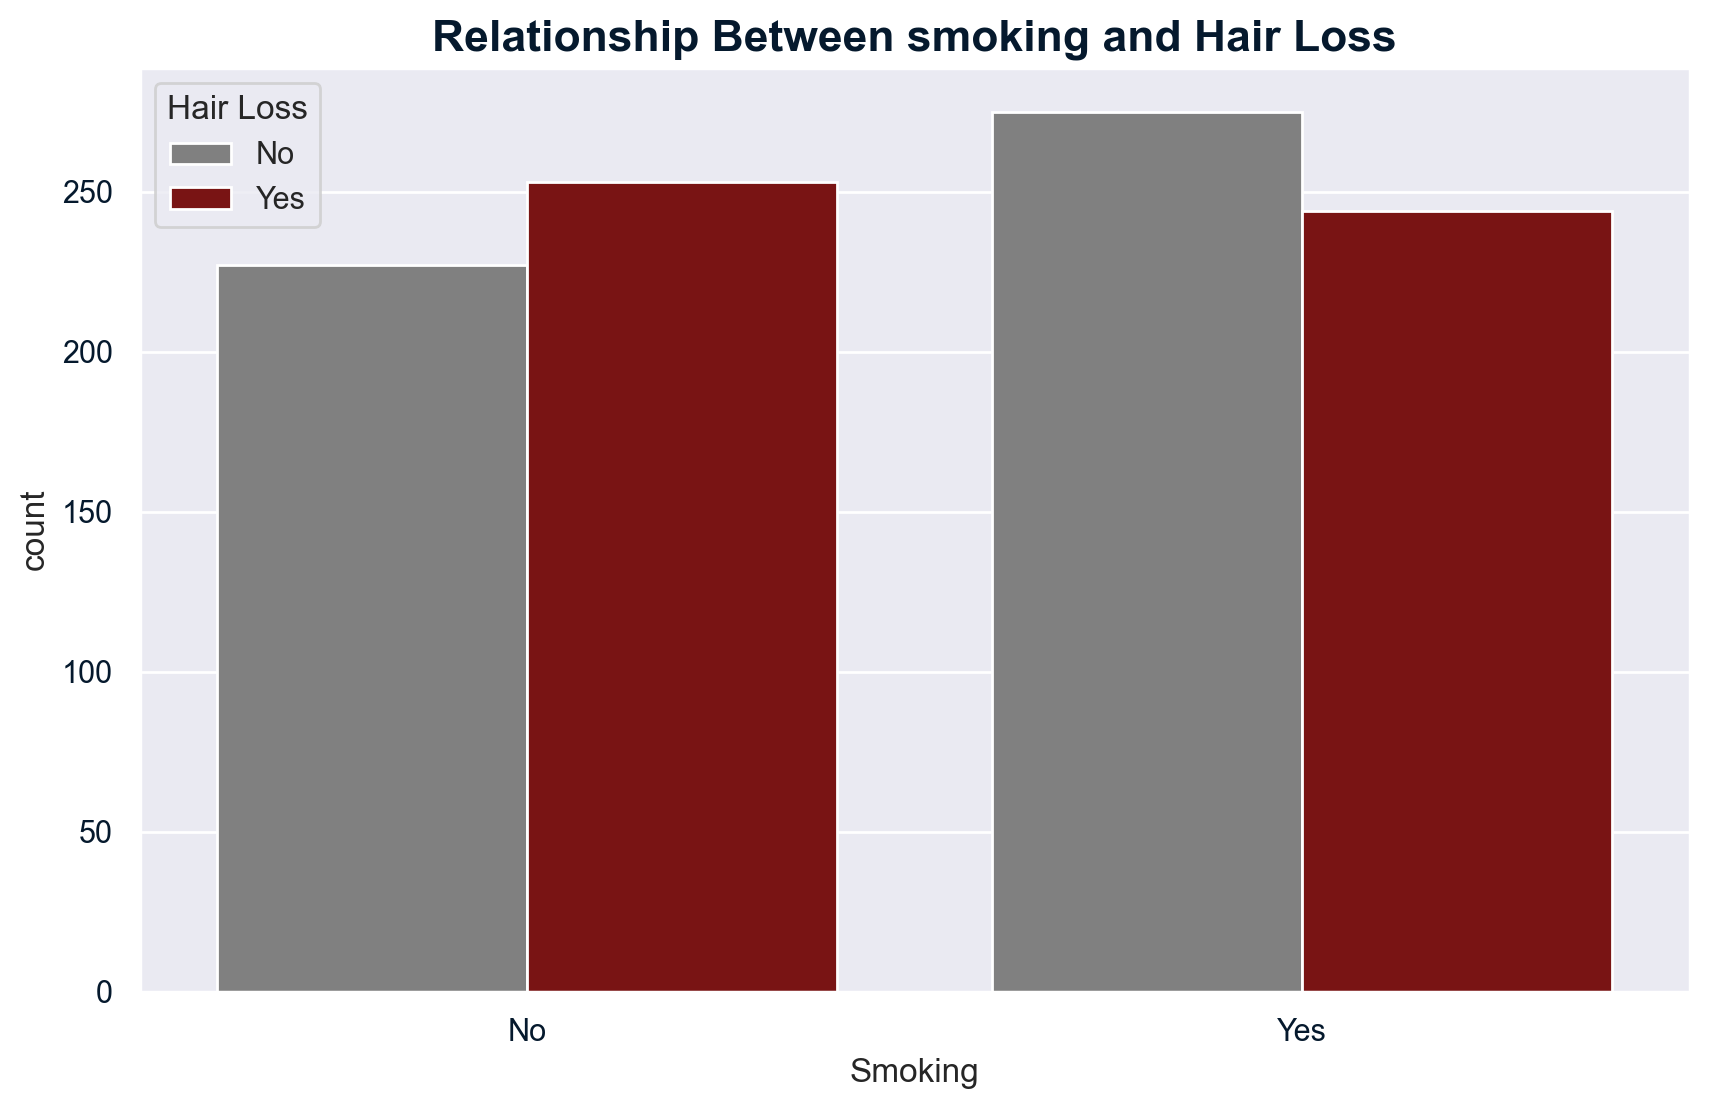

In [112]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between smoking and Hair Loss',fontsize=16, fontweight='bold')
plt.show()

This chart suggests that smoking does not have a significant impact on hair loss as significant percentage of non-smokers experience hair loss compared to smokers

#### 4.2.10 Weight Loss

Exploring the relationship between weight loss and the occurrence of hair loss.

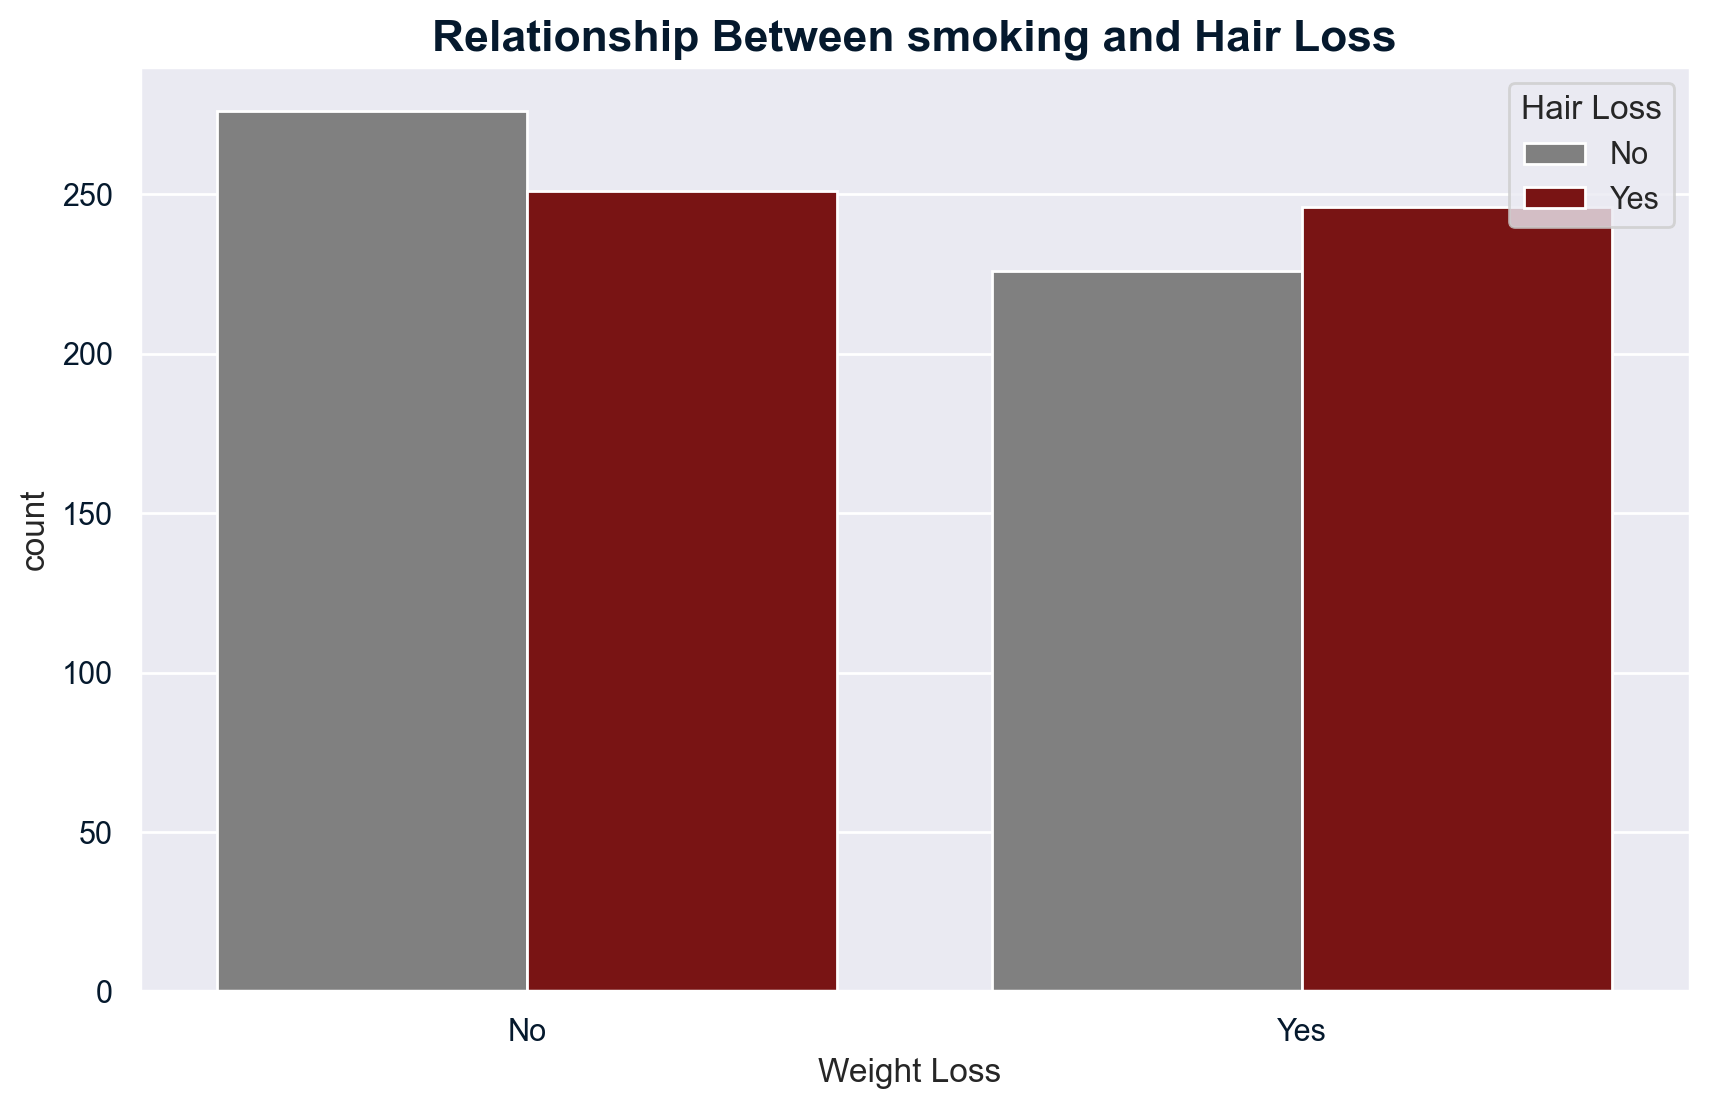

In [113]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Weight Loss ',hue='Hair Loss',palette=['gray','#8A0303'], data=df)
plt.title('Relationship Between smoking and Hair Loss',fontsize=16, fontweight='bold')
plt.show()

The plot suggests that individuals who have experienced weight loss are more likely to experience hair loss compared to those who have not experienced weight loss. This indicates a potential correlation between weight loss and the incidence of hair loss.

## 5.0 Model Fitting & Evaluation

Predicting Hair Loss is a Logistic regression problem that can be effectively tackled using a Logistic Regression model, which I've chosen as my foundational approach. To compare performance, I'm also using the Random Forest Classifier and Decision Tree classifier, both of which excel at capturing complex, non-linear patterns.

For model evaluation, I’m focusing on Recall, Precision and Accuracy, aiming to keep accuracy above 90%.

### 5.1 Pre-Processing

#### 5.1.1 One Hot encoding

The categorical variables will be encoded into binary values since the machine learning models I selected can only handle numeric data.

In [114]:
#creating a copy
df_model=df.copy()

In [115]:
#Mapping hair loss data back to "0" and "1" for modelling
df_model['Hair Loss']= df_model['Hair Loss'].map({'No':0,'Yes':1})

In [116]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the relevant columns
for column in df_model.columns:
    if df_model[column].dtype == 'object':
        df_model[column] = label_encoder.fit_transform(df_model[column])

df_model.head()


,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,1,0,5,8,2,2,19,1,1,0,0,0
1,0,0,4,1,2,0,43,1,1,0,0,0
2,0,0,3,3,5,2,26,1,1,0,1,0
3,1,1,7,1,0,2,46,1,1,0,0,0
4,0,0,6,0,1,2,30,0,1,1,0,1


Transformed the dataframe to a numeric representation using Label Encoding.

#### 5.1.2 Train-Test Split

Spliting the data into Train and test set to allow for evaluation on the test set ( unseen data). The data would be split 80/20 in favour of the train set

In [117]:
#defining the Target and features
y= df_model['Hair Loss']
X= df_model.drop('Hair Loss',axis=1)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)


In [118]:
#Normalization using a StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)


### 5.2 Logistic Regression Model

The Logistic Regression model was chosen as the base model to establish a foundation for other ensemble and tree models to build upon and enhance.

- Model instatiation

In [119]:
#Expatiating the Logistic regression model on the training dataset
logreg=LogisticRegression()

#Training our model on the training set
logreg.fit(X_train,y_train)

LogisticRegression()

- Model Evaluation

Confusion Matrix:
 [[79 38]
 [79 54]]
Accuracy Score: 0.53
AUC: 0.56


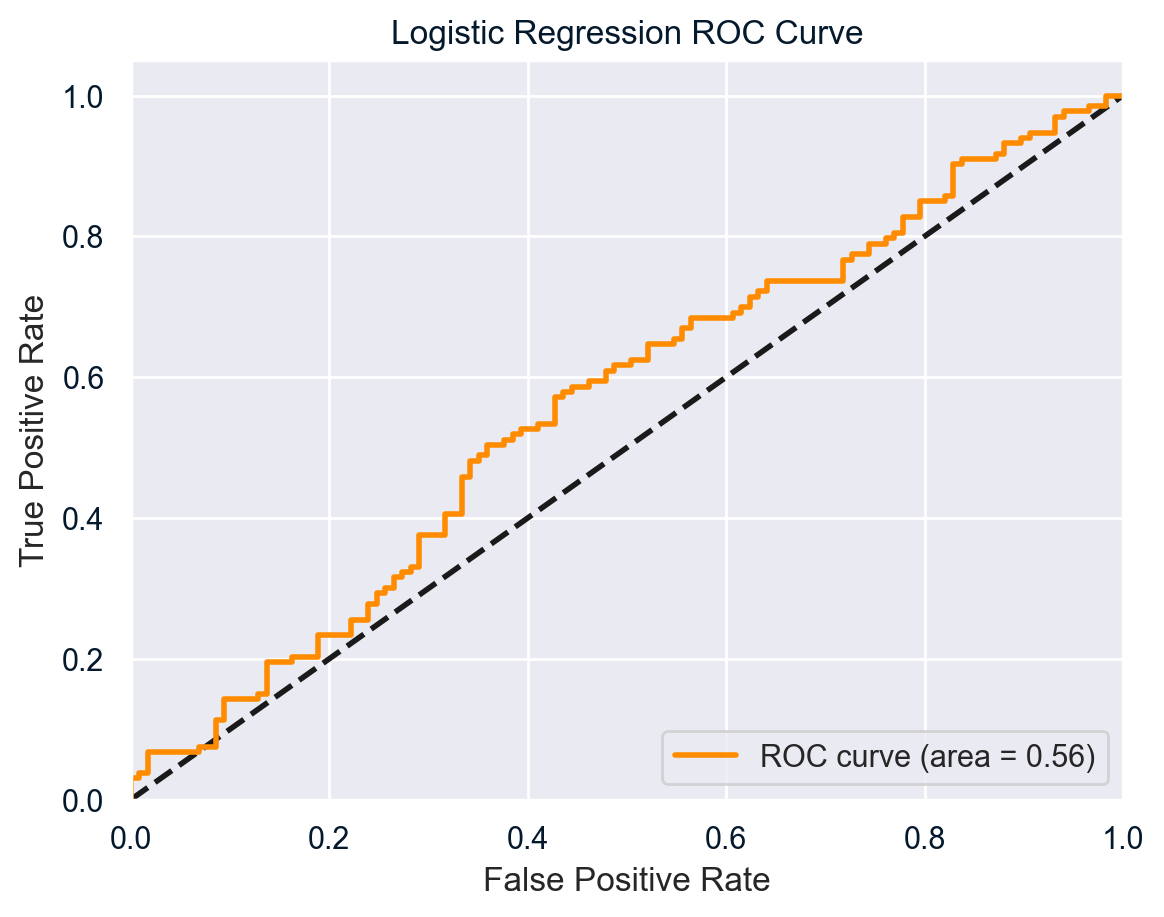

In [120]:
# Predictions
y_pred_log = logreg.predict(X_test)
y_pred_proba_log = logreg.predict_proba(X_test)[:, 1]  # probabilities for the positive class (hair loss)


# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred_log)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba_log)))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_log))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()


The logistic model achieved an accuracy of 53% and an AUC score of 0.56.

### 5.3 Random Forest Model

The Random Forest model is an ensemble method chosen for its robustness and ability to withstand the impact of extreme values in the dataset.

- Model Instatiation

In [121]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=6,min_samples_leaf=8,random_state=SEED)
# Fit the model to your data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

Confusion Matrix:
 [[81 36]
 [85 48]]
Accuracy Score: 0.52
AUC: 0.53


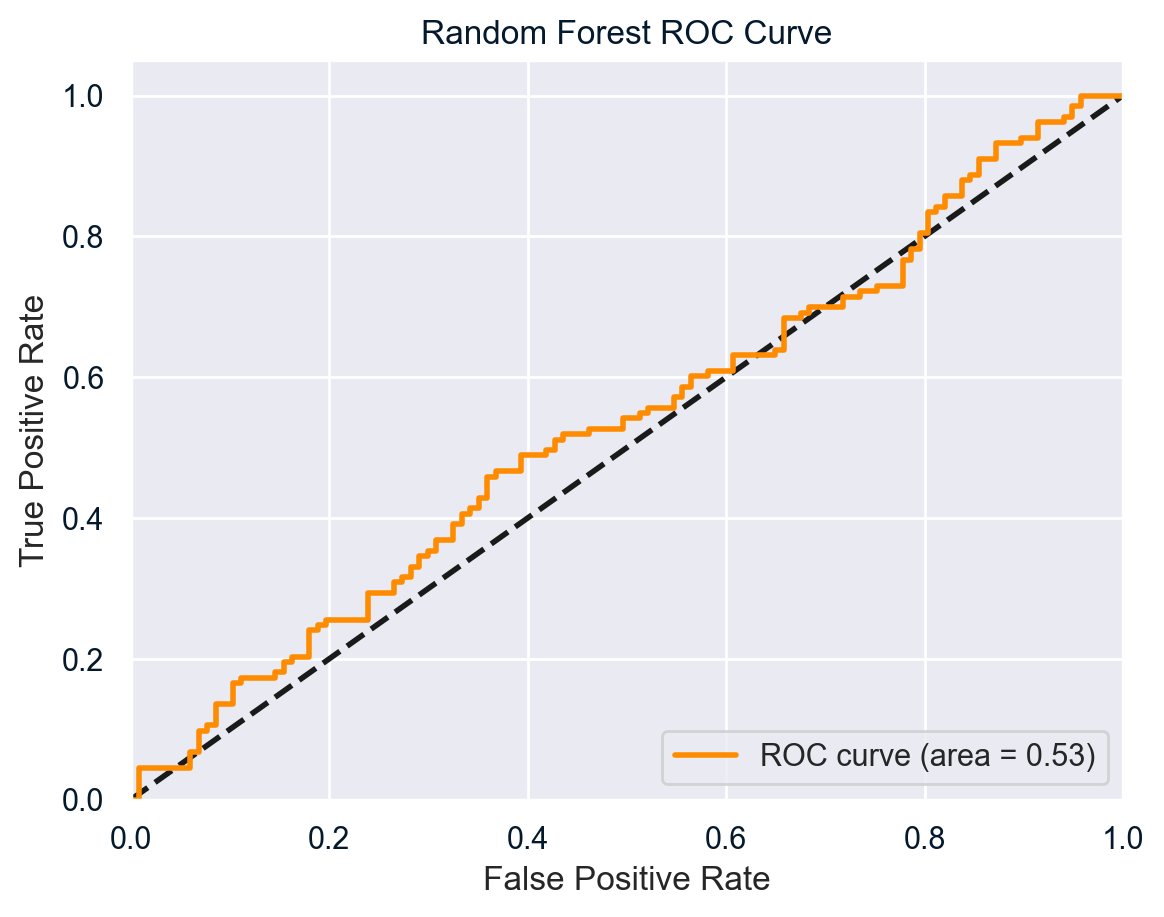

In [122]:
# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # probabilities for the positive class


# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba_rf)))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_rf))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


The Random forest model achieved an accuracy of 52% and an AUC score of 0.53 performing slightly less than the base logistic model

### 5.4 Decision Tree model
Decision tree is a tree based model

- Model instatiation

In [123]:
# Instantiate the Decision Tree Classifier
dt = DecisionTreeClassifier()
# Fit the model to your data
dt.fit(X_train, y_train)


DecisionTreeClassifier()

- Model Evaluation

Confusion Matrix:
 [[70 47]
 [70 63]]
Accuracy Score: 0.53
AUC: 0.54


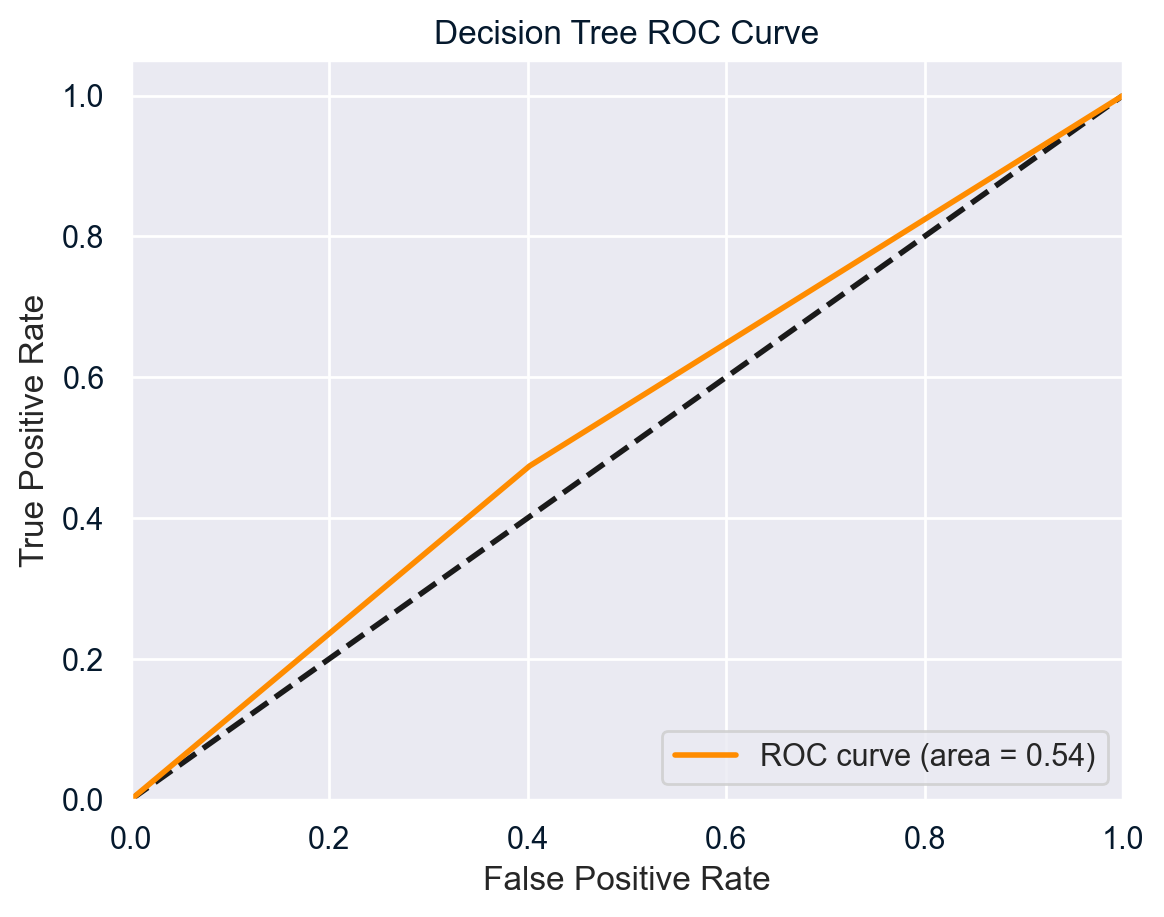

In [124]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba_dt)))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_dt))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()


The Random forest model achieved an accuracy of 54% and an AUC score of 0.54.

- Hyperparameter Tuning

The Decision Tree hyperparameters would be tuned using GridsearchCv module with an aim of finding the best hyperparamters and improving   the best performing models performance

In [125]:
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5,10,15,20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Accuracy: 0.55


The decision tree model was tuned, achieving an accuracy of 55%.

- Feature Importance

Checking the features that contiributed the most to the model performanceChecking the features that contiributed the most to the model performance

In [126]:
# Initialize the model
model = best_model
features=X_train.shape[0]
# Perform RFE with decision tree as the estimator
rfe = RFE(estimator=model, n_features_to_select=features, verbose=1)
rfe.fit(X_train, y_train)

# Predict and calculate the accuracy score on the test set
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, rfe.predict(X_test))))

# Assuming X_train is a numpy array
selected_features = np.array(X.columns)[rfe.support_]

# Convert the selected features of X_test to a numpy array
X_test_selected = X_test[:, rfe.support_]

# Refit the model on the entire training data using only the selected features
model.fit(X_train[:, rfe.support_], y_train)

# Extract feature importances from the fitted model
importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.feature_importances_.round(2)
})

importance.sort_values(by='Importance', ascending=False)


Accuracy Score: 0.54


,Feature,Importance
4,Nutritional Deficiencies,0.15
6,Age,0.15
2,Medical Conditions,0.13
3,Medications & Treatments,0.13
5,Stress,0.12
0,Genetics,0.08
7,Poor Hair Care Habits,0.06
8,Environmental Factors,0.06
10,Weight Loss,0.06
1,Hormonal Changes,0.05


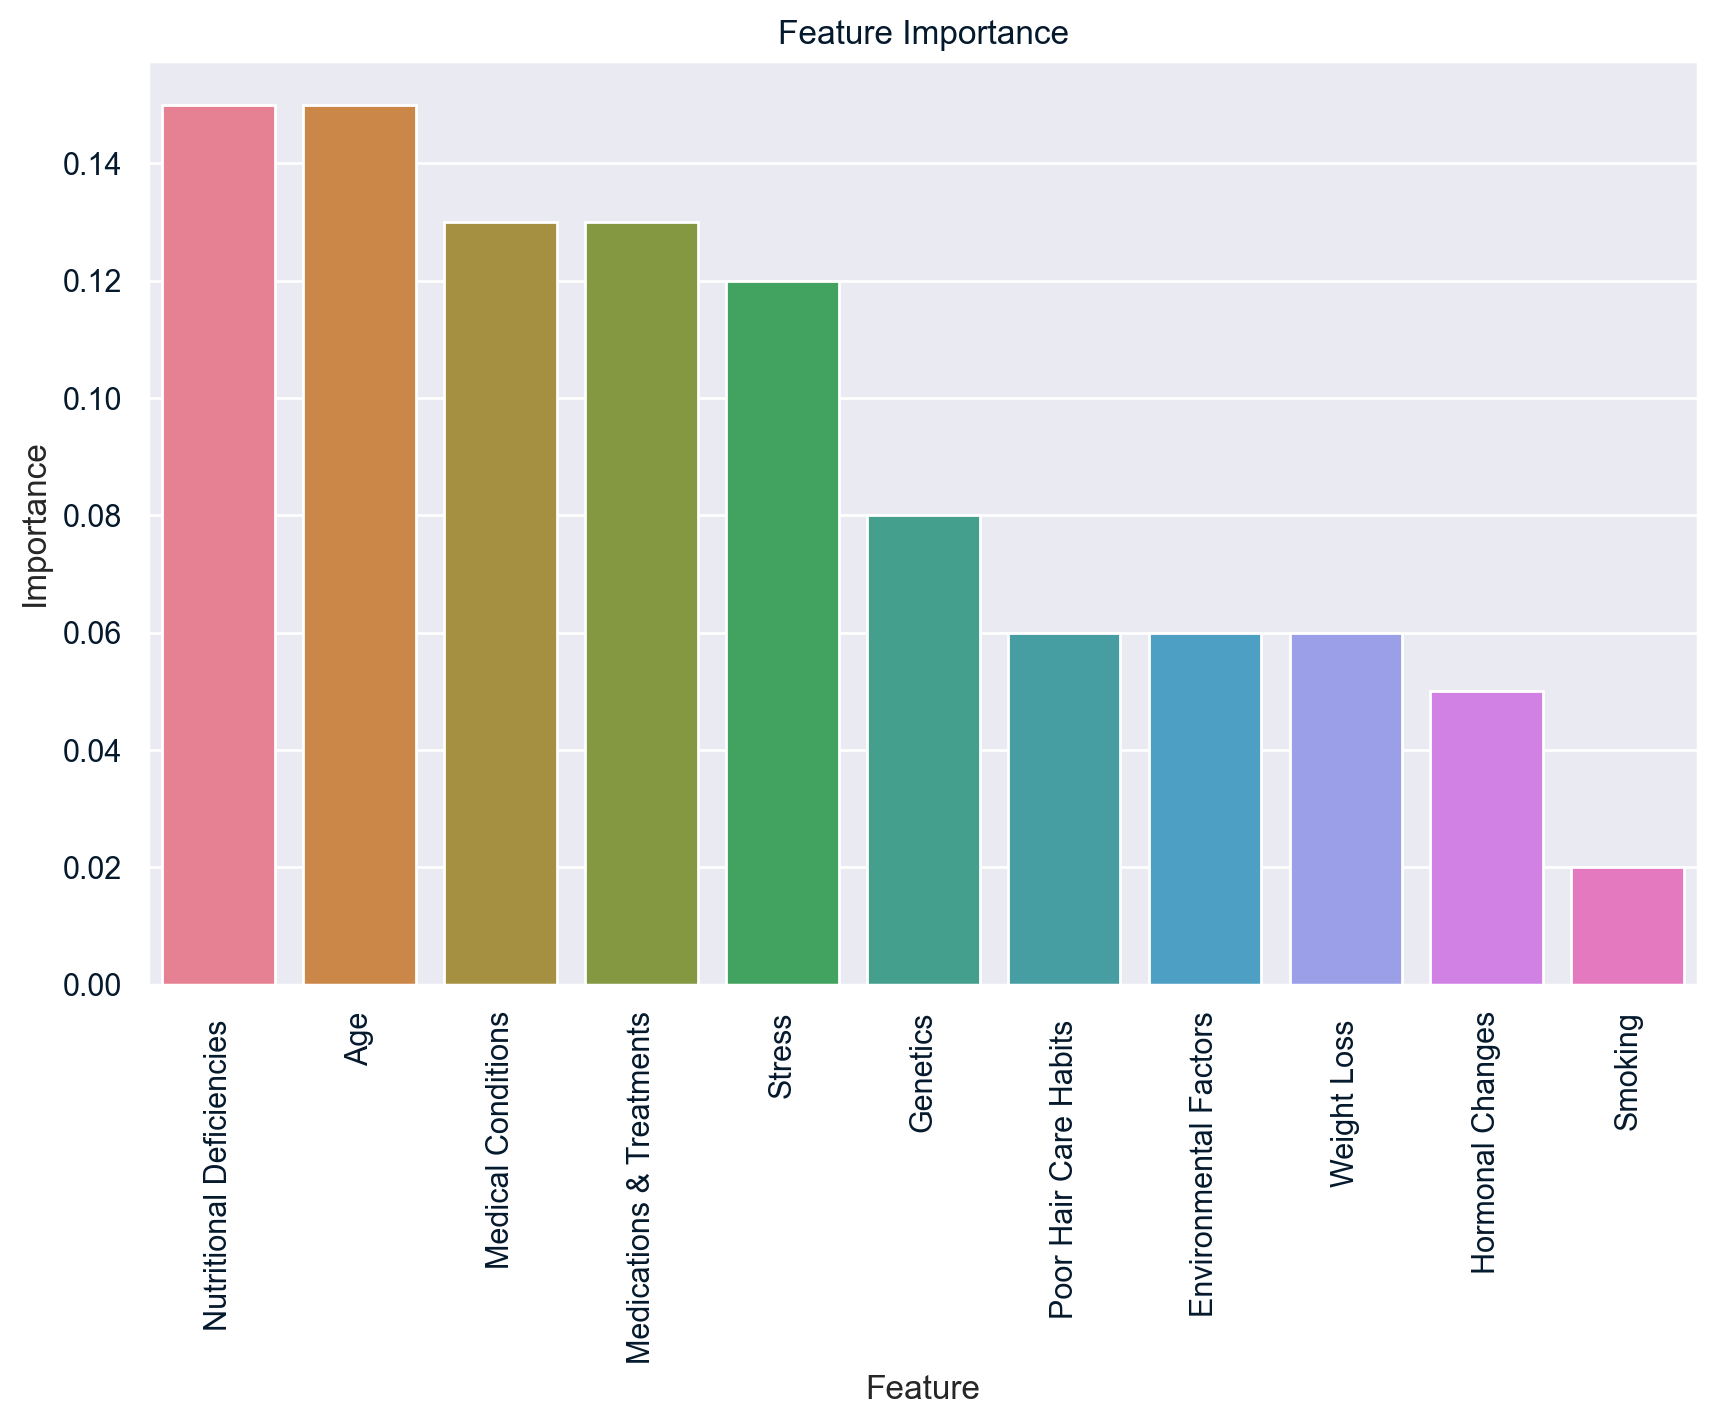

In [127]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance.sort_values(by='Importance',ascending=False),hue='Feature',legend=False)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

This bar chart illustrates the significance of various features in the hair loss predictive model. The x-axis represents the different features, while the y-axis indicates the importance of each feature predicting hair loss.

- Key Features and Their Importance:
    Nutritional Deficiencies: ~0.145

        Age: ~0.14

        Medical Conditions: ~0.125

        Medications & Treatments: ~0.125

        Stress: ~0.115

        Genetics: ~0.095

        Poor Hair Care Habits: ~0.085

        Environmental Factors: ~0.08

        Weight Loss: ~0.08

        Hormonal Changes: ~0.065

        Smoking: ~0.045

Interpretation:
Most Significant Features: Nutritional Deficiencies and Age are the top two features, indicating they have the highest influence on the outcome.

Moderately Significant Features: Medical Conditions, Medications & Treatments, and Stress follow closely, also playing a substantial role.

Least Significant Features: Smoking has the lowest importance, suggesting it has the least influence compared to other features.


In summary, this plot is essential for highlighting which features are most and least important, enabling focused and informed decision-making in hair loss research.

## 6.0 Segmentation Analysis
Segmenting individuals based on features in our dataset that contribute to hair loss using cluster analysis.

### 6.1 Scaling
scaling the features for the clustering

In [128]:
# Scaling the features
X_scaled = Scaler.fit_transform(X)
scaled_df = pd.DataFrame(data=X_scaled,columns=X.columns)
scaled_df

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss
0,0.955925,-1.019203,0.039004,0.989552,-0.981539,1.183444,-1.620370,1.015129,0.983125,-1.039832,-0.946380
1,-1.046107,-1.019203,-0.270243,-1.171578,-0.981539,-1.256722,0.940099,1.015129,0.983125,-1.039832,-0.946380
2,-1.046107,-1.019203,-0.579490,-0.554112,-0.047675,1.183444,-0.873567,1.015129,0.983125,-1.039832,1.056658
3,0.955925,0.981158,0.657498,-1.171578,-1.604115,1.183444,1.260157,1.015129,0.983125,-1.039832,-0.946380
4,-1.046107,-1.019203,0.348251,-1.480310,-1.292827,1.183444,-0.446822,-0.985096,0.983125,0.961694,-0.946380
...,...,...,...,...,...,...,...,...,...,...,...
994,0.955925,-1.019203,1.275992,1.298285,0.574901,-0.036639,-0.126763,1.015129,0.983125,0.961694,1.056658
995,0.955925,0.981158,0.039004,-1.480310,-0.047675,-0.036639,1.366843,-0.985096,-1.017164,-1.039832,1.056658
996,-1.046107,0.981158,-1.197984,-0.862845,-0.047675,1.183444,-1.513684,1.015129,-1.017164,0.961694,1.056658
997,-1.046107,0.981158,-0.888737,0.680819,-1.604115,1.183444,-0.233449,1.015129,0.983125,0.961694,1.056658


### 6.2 Principal Component Analyis

Using PCA for dimentionality reduction

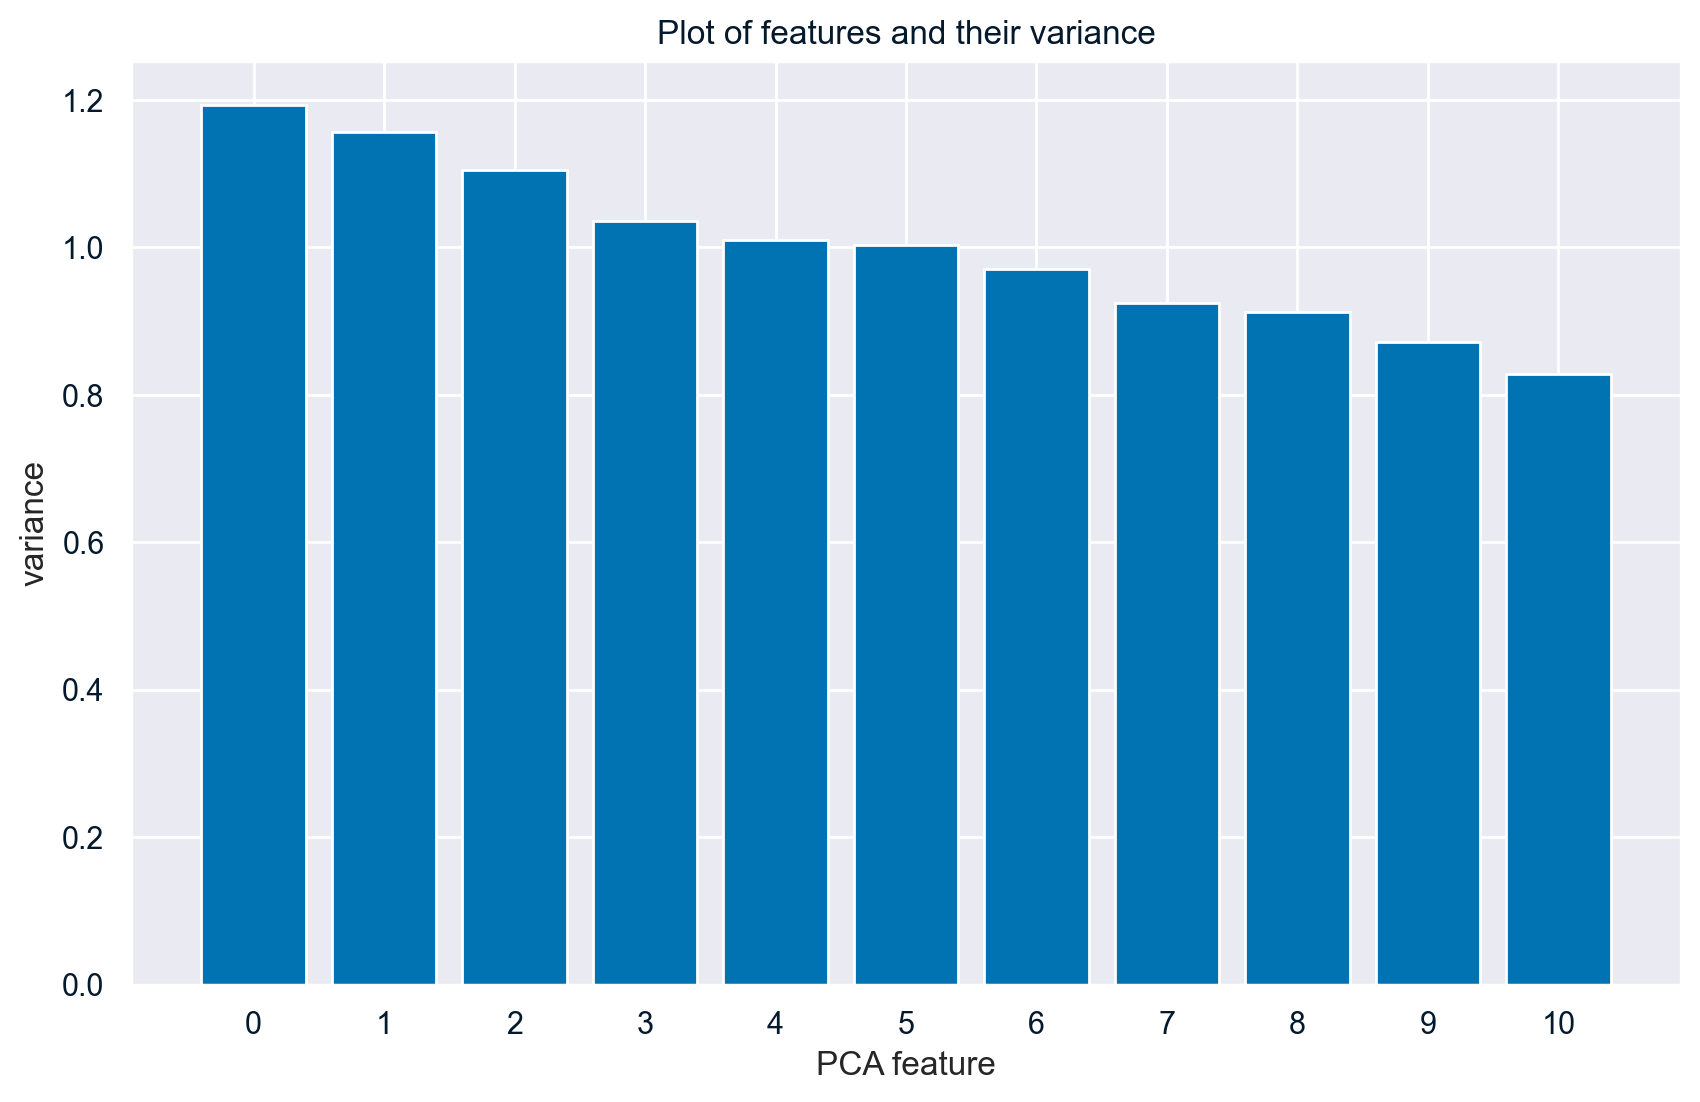

3


In [129]:
#Principal component Analysis
pca = PCA()
pca.fit(scaled_df )
features = range(pca.n_components_)
variance= pca.explained_variance_
plt.figure(figsize=(10, 6))
plt.bar(features,variance)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.title('Plot of features and their variance')
plt.show()
variance_ratio= pca.explained_variance_ratio_
variance_ratio
n_components=sum(variance_ratio>0.1)
print(n_components)

The PCA revealed three significant components that each explain more than 10% of the variance.

In [130]:
#applying the PCA fit_transform module on our dataset
pca = PCA(n_components)
customer_PCA = pca.fit_transform(df_model)
print(customer_PCA.shape)

(999, 3)


### 6.3 Clustering using Kmeans

Clustering the individuals into differnt hair loss clusters

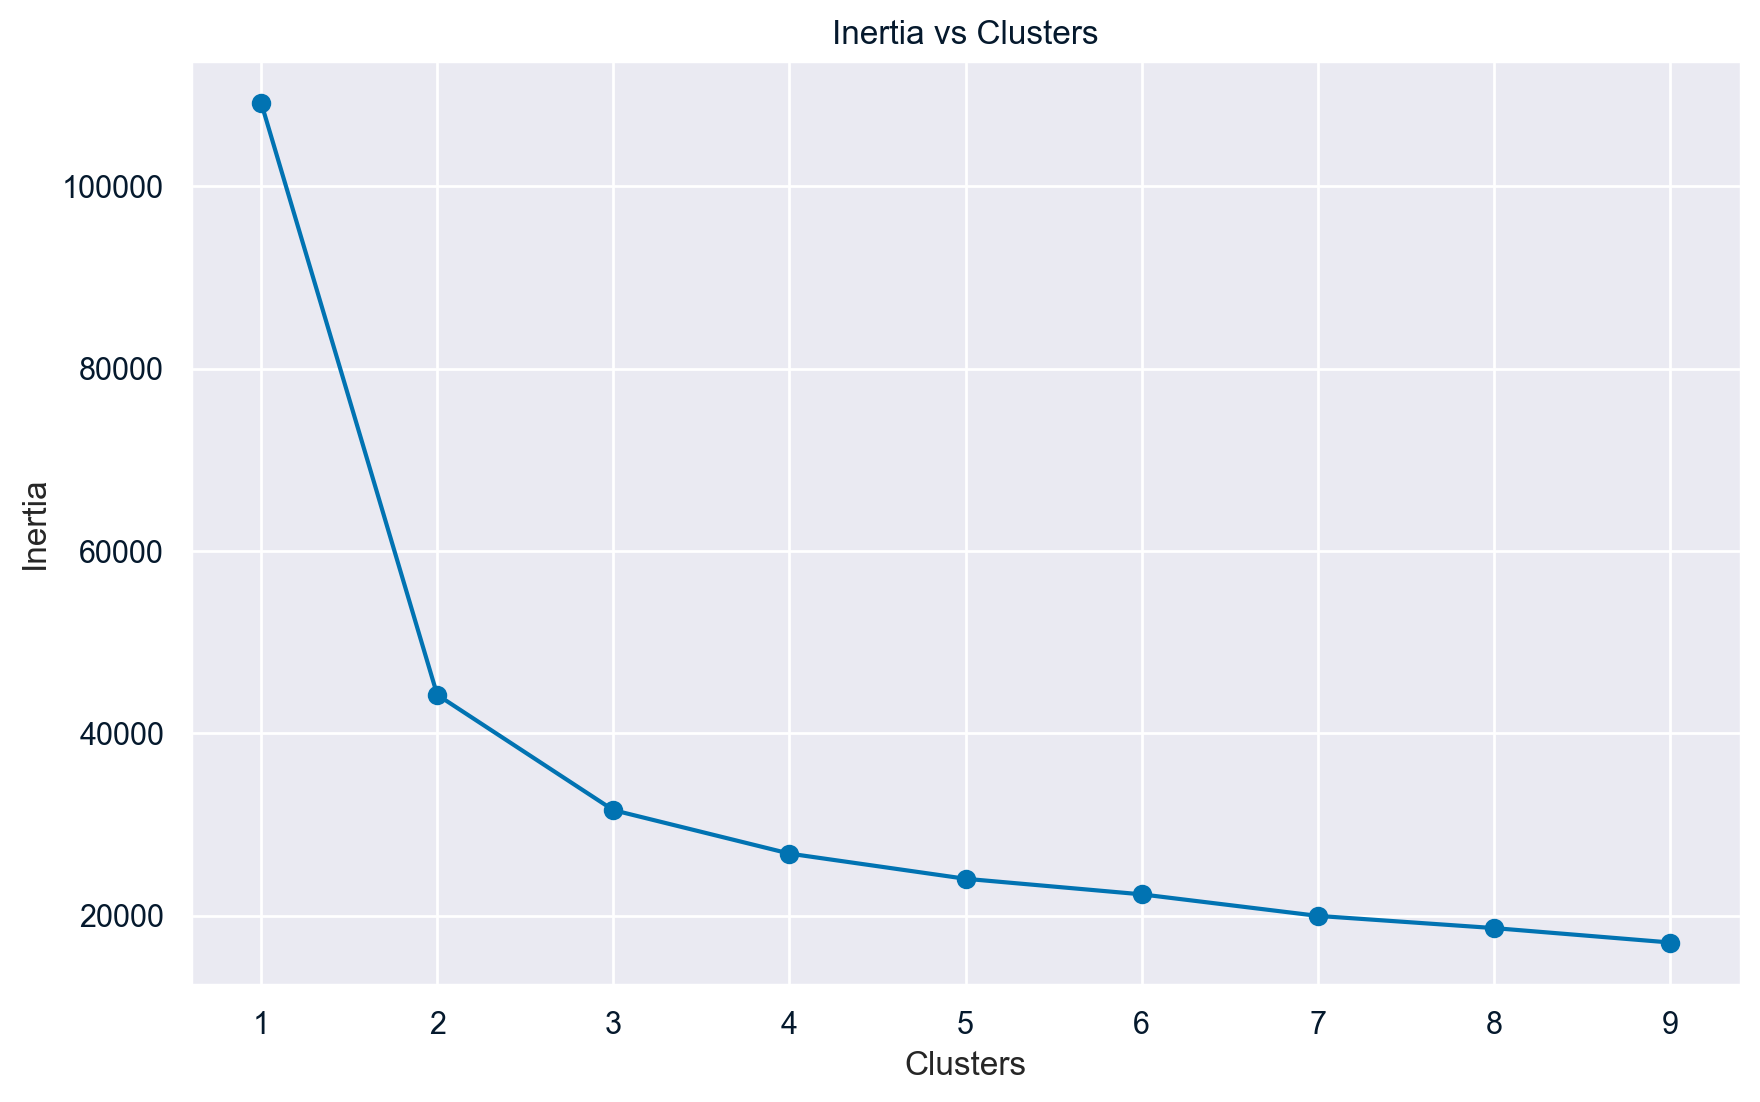

In [131]:
#Using Kmeans clustering to obtain the Inertia of our model and obtain the number of clusters
clusters=range(1,10)
inertia=[]
for i in clusters:
    model = KMeans(n_clusters=i,random_state=SEED)
    model.fit(customer_PCA)
    inertia.append(model.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(clusters,inertia,marker="o")
# Add x and y labels
plt.xlabel('Clusters')
plt.ylabel('Inertia')

# Add a title
plt.title('Inertia vs Clusters')
plt.show()

The plot suggests that using 3 hair loss clusters provides a good balance between simplicity and effective segmentation of the dataset.

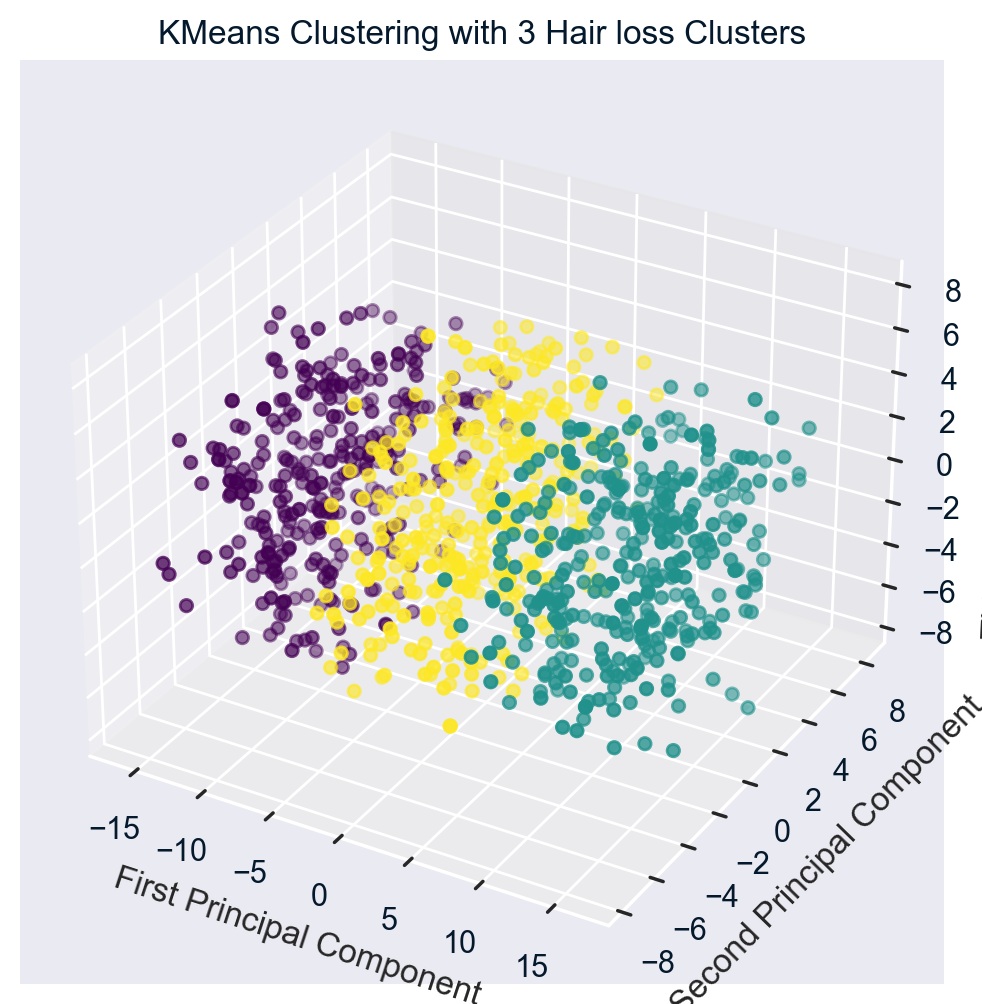

In [132]:
#3D sctter plot of our princpal componets colored with the hair loss segments
n_clusters=3
kmeans = KMeans(n_clusters,random_state=SEED)
kmeans.fit(customer_PCA)
# Get the cluster assignments
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(customer_PCA[:, 0], customer_PCA[:, 1], customer_PCA[:, 2], c=labels, cmap='viridis')

ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.title('KMeans Clustering with {} Hair loss Clusters'.format(n_clusters))

plt.show()

The plot shows a 3D scatter plot of data points clustered into three distinct groups using the KMeans clustering algorithm. Each cluster is represented by a different color (purple, yellow, and teal). The axes are labeled as the first and second principal components, with the third axis representing another dimension of the data. This visualization shows how the data points related to hair loss are grouped based on their similarities, with each cluster representing a different type or pattern of hair loss.

### 6.4 Hair Loss clusters

Exploring the 3 different hair loss clusters

In [133]:
#Adding the hair loss segment label to our dataframe
df["Label"]=labels
df

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Label
0,Yes,No,None,None,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,No,1
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,No,1
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,Yes,2
995,Yes,Yes,None,Accutane,Protein deficiency,Low,47,No,No,No,Yes,No,0
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,Yes,1
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,Yes,2


The Clustering reveals three distinct hair Loss groups 

#### 6.4.1 Visualizig the hair loss clusters

Visualizing the relationship between hair loss clusters and age distribution.

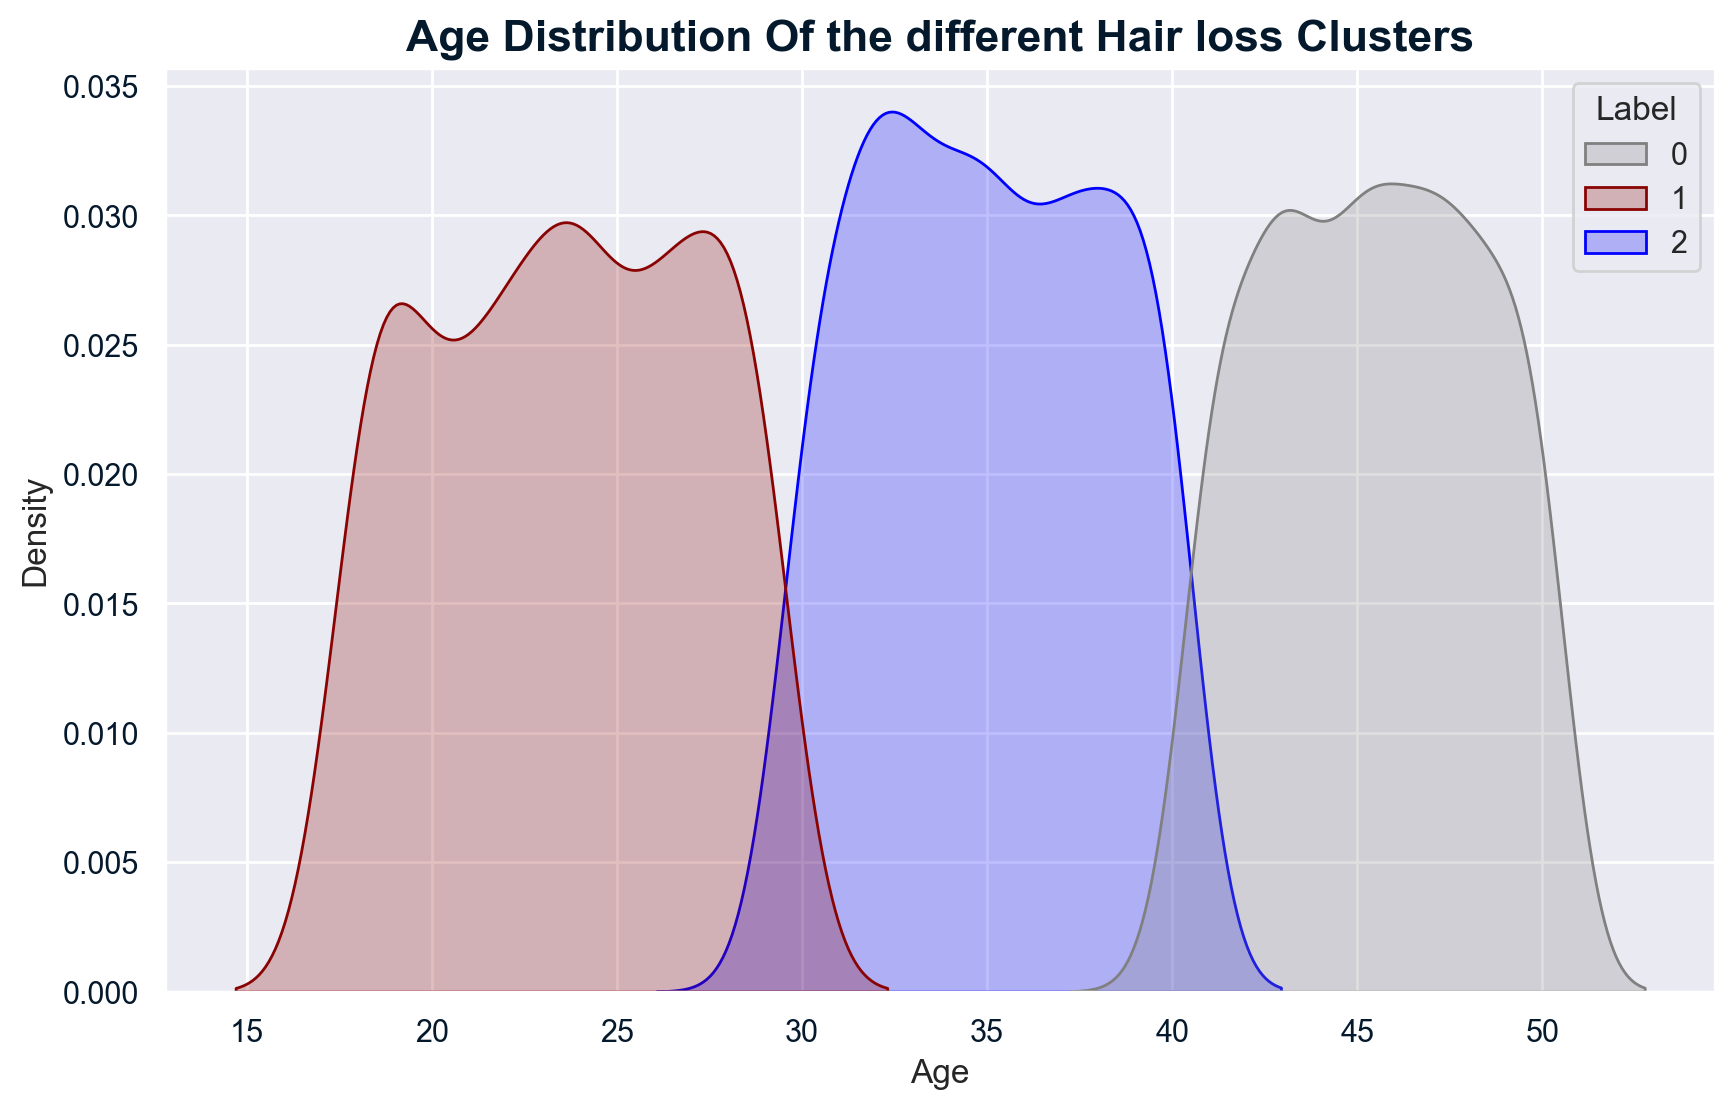

In [134]:
#visualizing the relationship
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Age', data=df,hue='Label', fill=True,palette=['gray','#8A0303','blue'])
plt.title('Age Distribution Of the different Hair loss Clusters',fontsize=16, fontweight='bold')
plt.show()

Cluster 0: Individuals in this cluster tend to be older, around 45 years old.

Cluster 1: This cluster has a younger demographic, with individuals primarily around 25 years old.

Cluster 2: Individuals in this cluster are mostly in their mid-30s.

In summary, the density plot visually represents the age distribution across different hair loss clusters, highlighting the distinct age ranges prevalent in each cluster



## 7.0 Summary

Exploratory Data Analysis (EDA) uncovered critical insights into the relationships between various factors and hair loss. It revealed that genetic predisposition and specific medical conditions, such as alopecia, are strongly correlated with hair loss. Nutritional deficiencies and high stress levels also have a moderate association with hair loss, while factors like smoking and poor hair care habits showed weaker associations.

I developed logistic regression, random forest, and decision tree models, with the decision tree model performing the best, though its accuracy remained below 60%.

Key features in the predictive models were age, medical conditions, and nutritional deficiencies.

K-means clustering segmented individuals into three distinct groups based on age and hair loss patterns, highlighting significant demographic trends across the clusters.

Overall, this project establishes a promising foundation for hair loss prediction, identifying significant risk factors and providing actionable insights for healthcare and wellness industries.